In [1]:
import json
import pandas as pd
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk.classify.util


import matplotlib.pyplot as plt 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Are we talking about the weather because of the weather? (Looking at Twitter Data and Extreme Storm Weather)

## Background

"How's the weather?" "It sure is sunny today."

Talking about the weather is a common topic in everyday conversations, but how much does the weather affect us?

It has been said that weather affects our mood. During winter months, some people are said to feel more down. The medical name for it is Seasonal Affective Depression (seasonal affective disorder, or SAD). WebMD cites this as a “mood disorder that happens every year at the same time.” One theory is that less sunlight during the fall and winter leads to the brain making less serotonin thus leading to nerve cell pathways that don’t function normally. This results in feelings of depression, along with symptoms of fatigue and weight gain.

Schwarz and Clore's study titled, "Misattribution, and Judgments of Well-Being: Informative and Directive Functions of Affective States" took a look at if a generally happy person can be made sad by the weather subconsciously. In the study they found that participants "self-reported happiness and overall life satisfaction changed based on the climate." In their research, they started an interview with a simple, "how's the weather" over the phone and it preempted participants to think about the weather because they spoke about how they were feeling. This study showed that people can be "misdirected and emotionally confused by subconscious stimuli." 

But what about when people aren't preempted to talk about the weather by someone, will they start writing about it when the weather is bad? What will prompt it? Weather as an icebreaker is different from when someone decides to write about it.

Let's shift the idea of weather to a different focus. 

In Kathryn Schulz's "Writers in The Storm" article, she explains how weather went from symbol to science and back to it again. She opens her article citing Mark Twain who declares "No weather will be found in this book" and how he was determinded to do without it because it usually gets in the way of the story. She explains that weather has two "terrible reputations:"
<ul>
    <li> "On the one hand, weather is widely regarded as the most banal topic in the world—in print as in conversation, the one we resort to when we have nothing else to say"</li>
    <li> "On the other hand, it stands perpetually accused of melodrama." </li>
</ul>

Weather works so well as a symbol, Alexandra Harris wrote,  because "it's literal manifestation is oddly slippery. She accounts that weather is one of the most potent forces in our lives is often "imperceptible, perpetually changing, and frequently mysterious." Weather is also used to as a symbol to not only describe ourselves by our societies as whole. 

Throughout the article Schulz goes over how the weather's role changed in literature. The earliest stories about the weather were about beginnings and endings (the beginning and end of the world). She concludes that today (the article is written in 2015) it's even MORE difficult to image an end of the world that isn't driven by a change in the weather.  


## So, a tweet about the weather...

When people tweet, they aren't preempted to talk about something and they are free to tweet about anything they want that is under 140 characters. So when are people likely to begin talking about the weather via tweets? When we talk about the weather, are we talking about the weather because it's so different from the temperatures we're used to? Are we usually talking about good things or bad things or is weather perpetually a symbol of our impending doom?

I would like to hypothesize that we tweet more about the weather it's raining or cold or when there's negative extreme weather and that our tweets are more likely to be negative than positive. 

I feel more inline with the thoughts of the social scientists than of the humanists in this case. I think tweets are more similar to our natural talk despite being written text and that it is less likely for tweets to be overly symbolic like in literature. It's interesting to think of where tweets fall in fields because they are social, but people are constructing their own stories about their lives in them so are they going to mention weather to explain their own mood.

## Why computational methods?

Twitter and sentimental analysis are probably one of the hottest and most popular things to do nowadays, but what I'm interested in is being able to match different but related datasets because this would bridge different fields together. We already know that there are methods to find sentiment and we're working to make them better, but what can we add on and how can we use this data to make it more relevant to fields who want to know more about people. I don't see this as a substitute for something like an interview but as another step. 

Twitter has location and dates and from that information you can learn about what the weather was like by looking at other datasets that have weather data. I don't think a lot of people have used Twitter Data sets and weather data because the two are generally used by two different fields who probably don't meet, but in general, I see how approaching a problem like has a big potential for producing a lot more more noise than signal and might not even work.

But on the other hand, no one is going to read through 3 million tweets just to find tweets about weather because there's just so much twitter data. In addition, just matching up all of the different weather data even though there are databases make it very difficult. Therefore, computational methods are very useful for just sort and sifting through the vast twitter sea at least to help people pinpoint to tweets or text that may be of interest. Some hand-driven methods are needed and will be used (such as specifying specific words to search for).





<b>Sources:</b><br>
Seasonal Depression (Seasonal Affective Disorder) - WebMD http://www.mayoclinic.org/diseases-conditions/seasonal-affective-disorder/basics/definition/con-20021047 <br>

Why We Always Talk about the Weather - http://www.sentientdecisionscience.com/why-we-always-talk-about-the-weather/ <br>

Schulz, Kathryn - Writers in the Storm http://www.newyorker.com/magazine/2015/11/23/writers-in-the-storm






## Corpus
This project works at combining two different data sets and matching the two together to create a new corpus. There is a twitter corpus and a weather corpus. In this section I will provide a short overview of what is in the full corpus and later go into what each individual piece is about. 

### Twitter Corpus
The corpus I will be exploring is a set of scraped public twitter updates that were used by Cheng, Caverlee, and Lee in their "You Are Where You Tweet Study: A Content-Based Approach to Geo-locating Twitter Users" paper. The corpus provides both a training and test set of tweets collected from September 2009 to January 2010. The training set contains 115,886 Twitter users and 3,844,612 updates from the users and all of the locations are self-labeled. The test set contains 5,136 Twitter users and 5,156,047 tweets from users and the locations are uploaded from their smart phones using the form of "UT:Latitude, Longitude."

<b>Source:</b><br>
Z. Cheng, J. Caverlee, and K. Lee. You Are Where You Tweet: A Content-Based Approach to Geo-locating Twitter Users. In Proceeding of the 19th ACM Conference on Information and Knowledge Management (CIKM), Toronto, Oct 2010. 
https://archive.org/details/twitter_cikm_2010

### Extreme Storm Events Database

The National Centers for Environmental Information from the National Oceanic and Atmospheric Administration (NOAA) has an online database of storm events. From the online database, they state that the database contains records documenting: 

<ol>
<li>The occurrence of storms and other significant weather phenomena having sufficient intensity to cause loss of life, injuries, significant property damage, and/or disruption to commerce;</li>
<li>Rare, unusual, weather phenomena that generate media attention, such as snow flurries in South Florida or the San Diego coastal area; and</li>
<li>Other significant meteorological events, such as record maximum or minimum temperatures or precipitation that occur in connection with another event.</li>
</ol>

It currently contains data from January 1950 to January 2017. For this study, I will be pulling the records from January 2008 - December 2009 (the time period that matches the time period of the tweets). As for the location of these storms, the database only contains the State. 

<b>Source:</b><br>
https://www.ncdc.noaa.gov/stormevents/

## Data Cleaning
In this section I will go over what pieces of the corpus will be used for this research and what was done to clean and merge the two data sets. There were many challenges in combining these two data and these variables have an effect on how to view the results as a whole, so it is important to be aware of the limitations and biases in this corpus.

### Cleaning the Twitter Corpus 
Due to the largeness of this twitter set and lack of computational power, I will only be using a small subset of the twitter corpus to test and am aware of how this may be limiting to my findings. However, this too is only a small subset of tweets during a short period of time. In a further research, to better test my hypothesis, tweets from throughout the year (January - December) and from many different years would better (this would require a different twitter data set). 

How the corpus is set up, the list of users and location are separated from their tweets (since in the corpus some of the users have multiple. The training set of user locations are self-labeled so this creates a lack of consistency in the labeling. The second set, has longtiude and latitude coordinates. In an ideal case, I would use a package such as geopy (https://geopy.readthedocs.io/en/1.11.0/) which would convert the longitude and latitude coordinates into an object that would contain an address and from there I would be able to pull the state (however, this requires a lot of time to run through the list and would require further muddling with separating the address into a json and extracting the state).

To get the Twitter Corpus into a usable form to be matched with the Storm Events Database, I need the state and a time period. Not all of the self-reported twitter locations contain states and many of them only contain a city. In addition for some pieces that do contain the state name, it may be written as an abbreviation (CA) or in full (California). Again, due to the inconsistencies and lack of computational available on the machinery being used to complete this task, the user's city name is pulled and that is to be matched to its corresponding state (this is done by comparing the city to a spreadsheet that provides the state and city name). The problem with this method is that cities with the same name exist in different states and matching in this fashion can either produce the same user being repeated in the same set for each state (which would increase their influence because they would be overrepresented) or a user being matched into the wrong state. This issue can be solved by using longitude and latitude. Because the corpus separates the user/location from the tweets, this requires us to match all of the users to a state before we can rematch them to their tweets. The size of users is unfortunately more than my machine can handle which is why I have resorted to this method.

In addition, to fish out tweet that have any sort of potential of talking about the weather, I will only be using tweets that mention the word "weather." In previous explorations of this data, I have looked at samples of the dataset, but many of those tweets do not talk about the weather and by focusing on tweets that mention the weather, we are more likely to get a better sample of users who feel affected by the weather. 

In [2]:
# opening twitter data and inputting it into a list
user_data_path = '../data_dump/twitter_cikm_2010/training_set_users.txt'

user_data = []
user_data_file = open(user_data_path, "r")
for line in user_data_file:
        user_data.append(line.strip().split('\t'))

In [3]:
# Putting the twitter user information and cleaning the data for only the city name
user = pd.DataFrame(user_data)
user_location = user.rename(columns={0: 'user', 1: 'location'})


user_location['location'] = user_location['location'].apply(lambda x: x.split(',')[0])
user_location

,user,location
0,14,San Francisco
1,15,San Francisco
2,18,San Francisco
3,19922973,Chicago
4,63963170,New York
5,17825828,Houston
6,71303208,Buffalo
7,24117294,Brooklyn
8,67,Bloomington
9,15728730,Las Vegas


In [4]:
len(user_location)

115886

##### Matching Cities to States
To match the the cities to states, I have used the Google AdWords API to compile a list of city names and states.

<b>Source:</b><br>
https://developers.google.com/adwords/api/docs/appendix/geotargeting?csw=1


In [5]:
test_df = pd.read_csv("../data_dump/query.csv", sep = ',', encoding = 'utf-8',)
test_df

test_df = test_df.loc[test_df['Country Code'] == 'US']
test_df = test_df.loc[test_df['Target Type'] == 'City']
test_df['Canonical Name'] = test_df['Canonical Name'].apply(lambda x: x.split(','))

test_df['Canonical Name'] = [item[:-1] for item in test_df['Canonical Name']]
test_df['Canonical Name'] = [item[-1] for item in test_df['Canonical Name']]

test_df = test_df.rename(columns={'Name': 'location'})

combo_df = pd.merge(user_location, test_df, on='location')
combo_df

,user,location,Criteria ID,Canonical Name,Parent ID,Country Code,Target Type,Status
0,14,San Francisco,1014221,California,21137.0,US,City,Active
1,15,San Francisco,1014221,California,21137.0,US,City,Active
2,18,San Francisco,1014221,California,21137.0,US,City,Active
3,18874383,San Francisco,1014221,California,21137.0,US,City,Active
4,94,San Francisco,1014221,California,21137.0,US,City,Active
5,107,San Francisco,1014221,California,21137.0,US,City,Active
6,246,San Francisco,1014221,California,21137.0,US,City,Active
7,259,San Francisco,1014221,California,21137.0,US,City,Active
8,291,San Francisco,1014221,California,21137.0,US,City,Active
9,61,San Francisco,1014221,California,21137.0,US,City,Active


In [6]:
len(combo_df)

413022

As you can see this matching has inflated our number of entries by 297136 (413022 - 115886). Therefore, we will drop duplicates so that each user has only one location.

In [7]:
combo_df = combo_df.drop_duplicates(['user'], keep='last')
combo_df

,user,location,Criteria ID,Canonical Name,Parent ID,Country Code,Target Type,Status
0,14,San Francisco,1014221,California,21137.0,US,City,Active
1,15,San Francisco,1014221,California,21137.0,US,City,Active
2,18,San Francisco,1014221,California,21137.0,US,City,Active
3,18874383,San Francisco,1014221,California,21137.0,US,City,Active
5,107,San Francisco,1014221,California,21137.0,US,City,Active
6,246,San Francisco,1014221,California,21137.0,US,City,Active
7,259,San Francisco,1014221,California,21137.0,US,City,Active
8,291,San Francisco,1014221,California,21137.0,US,City,Active
9,61,San Francisco,1014221,California,21137.0,US,City,Active
10,66,San Francisco,1014221,California,21137.0,US,City,Active


#### Importing tweets and matching to user data

For this experiement we will only be looking at tweets that mention the word "weather."

In [8]:
# importing tweets

tweets_data_path = '../data_dump/twitter_cikm_2010/training_set_tweets.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
counter = 0
for line in tweets_file:
        tweets_data.append(line.strip().split('\t'))
        if counter > 50000:
            break
        counter += 1

In [9]:
# importing tweets

tweets_data_path = '../data_dump/twitter_cikm_2010/training_set_tweets.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
counter = 0
for line in tweets_file:
        tweets_data.append(line.strip().split('\t'))
        if counter > 4000000:
            break
        counter += 1

In [10]:
# tweets are turned into a data frame
tweets = pd.DataFrame(tweets_data)

# note: the tweet data contains 4 types of information, a user id, 
# an unindentifiable number which I refer to as mysterious, the tweet, and a timestamp

tweets_cleaned = tweets.loc[:,:3]
tweets_clean = tweets_cleaned.rename(columns={0:'user', 1: 'mysterious', 2: 'tweet', 3:'timestamp'})
tweets_clean

tweets_clean2 = tweets_clean[tweets_clean['tweet'].apply(str).str.contains('weather')]
tweets_clean2

,user,mysterious,tweet,timestamp
136,31064071,5984449271,@CarmenOOlalaa he's almost making an offer I c...,2009-11-23 13:03:19
147,31064071,5980607565,@SuaveSerg thanks! I'm here now missing the wa...,2009-11-23 10:31:00
150,31064071,5976719827,"At the airport, soon to trade this warm orland...",2009-11-23 07:54:13
615,22937622,3215543725,sitting in 94 degree weather for 4 hours today...,2009-08-09 18:23:45
1586,67,4716597568,You know the weather is getting bad when your ...,2009-10-08 15:48:44
1954,89,5496739344,"Colder weather is kind of exciting, except for...",2009-11-06 20:47:45
1961,89,5403089698,Did anyone tell the weather it's november?,2009-11-03 16:07:24
1990,15728730,1487963353,So much depends on the weather; so is it raini...,2009-04-09 21:43:48
2501,65667184,5544563981,Loving the cool weather! Sitting by the firep...,2009-11-08 17:53:44
2825,12163922,4975330424,For those who ask how much worse than NY Bosto...,2009-10-18 16:55:31


In [11]:
# This below will clean match the users' id to their specific tweet.
combined_df = pd.merge(combo_df, tweets_clean2, on='user')

combined_df['Canonical Name'] = combined_df['Canonical Name'].str.lower()
combined_df = combined_df.rename(columns={'Canonical Name': 'STATE'})
combined_df

,user,location,Criteria ID,STATE,Parent ID,Country Code,Target Type,Status,mysterious,tweet,timestamp
0,246,San Francisco,1014221,california,21137.0,US,City,Active,5492243263,@Poormojo yes! Do you mean the good weather ea...,2009-11-06 17:28:37
1,246,San Francisco,1014221,california,21137.0,US,City,Active,5407545247,I know three things to be true: SF weather is ...,2009-11-03 19:07:03
2,89,San Francisco,1014221,california,21137.0,US,City,Active,5496739344,"Colder weather is kind of exciting, except for...",2009-11-06 20:47:45
3,89,San Francisco,1014221,california,21137.0,US,City,Active,5403089698,Did anyone tell the weather it's november?,2009-11-03 16:07:24
4,10051,San Francisco,1014221,california,21137.0,US,City,Active,5539145659,"that's METARspeak for ""nice weather""",2009-11-08 13:53:29
5,10051,San Francisco,1014221,california,21137.0,US,City,Active,5539117423,"Headed to Oakland soon, where the weather is K...",2009-11-08 13:52:09
6,10051,San Francisco,1014221,california,21137.0,US,City,Active,5483875175,Deciphering DUAT data. I wonder how many pilot...,2009-11-06 11:27:42
7,12263,San Francisco,1014221,california,21137.0,US,City,Active,4696454250,I have a headache. Damn rainy Syracuse weather.,2009-10-07 19:39:32
8,12263,San Francisco,1014221,california,21137.0,US,City,Active,4476832966,@chrisspy How are you enjoying your poopy weat...,2009-09-29 13:47:02
9,12329,San Francisco,1014221,california,21137.0,US,City,Active,5012334962,San Francisco's small coastal weather system w...,2009-10-20 00:49:27


In [ ]:
# for cleaning timestamp errors, but does not apply to this set

combined_df_with_time = combined_df[~combined_df['timestamp'].isnull()]

combined_df_with_time = combined_df_with_time.reset_index(np.arange(len(combined_df_with_time)))

from datetime import datetime

timestamps = combined_df_with_time['timestamp']
datetimes = []
errors = []
for i in range(len(timestamps)):
    try:
        datetimes.append(datetime.strptime(timestamps[i], '%Y-%m-%d %H:%M:%S'))
    except:
        errors.append(i)
errors, len(datetimes)

combined_df_without_errors = combined_df_with_time.drop(combined_df_with_time.index[errors])
combined_df_without_errors = combined_df_without_errors.reset_index(np.arange(len(combined_df_without_errors)))

combined_df_without_errors['timestamp'] = datetimes

t = tweets_clean2['timestamp'][0]
t1 = datetime.strptime(t, '%Y-%m-%d %H:%M:%S')

# begin_date_time <= t
# t <= end_date

### Extreme Storm Events Database Cleaning & Combining the Two
This section comprises of the cleaning of the extreme storm events database and how it was cleaned. 
The databases are broken up into years, therefore I will be combining the 2008, 2009, and 2010 spreadsheets
for this study.

Below are the specific columns I will be taking from the data set to look at:<br>
Columns: STATE, EVENT_TYPE, BEGIN_DATE_TIME, END_DATE_TIME,<br>

The data set does not contains specific dates, but date ranges of when extreme storm events occured so the twitter data is matched to that whether that tweet falls under that data and is the user location matches with that set. 

In [13]:
storm2008_df = pd.read_csv("../data_dump/Stormdata_2008.csv", sep = ',', encoding = 'utf-8',
                           usecols=["STATE","EVENT_TYPE", "BEGIN_DATE_TIME", "END_DATE_TIME"])
storm2008_df

storm2009_df = pd.read_csv("../data_dump/Stormdata_2009.csv", sep = ',', encoding = 'utf-8',
                           usecols=["STATE","EVENT_TYPE", "BEGIN_DATE_TIME", "END_DATE_TIME"])
storm2009_df

storm_df = pd.concat([storm2008_df, storm2009_df], axis=0)
storm_df['STATE'] = storm_df['STATE'].str.lower()
storm_df

,STATE,EVENT_TYPE,BEGIN_DATE_TIME,END_DATE_TIME
0,indiana,Flood,1/1/2008 0:00,1/2/2008 15:45
1,alabama,Drought,1/1/2008 0:00,1/31/2008 23:59
2,alabama,Drought,1/1/2008 0:00,1/31/2008 23:59
3,alabama,Drought,1/1/2008 0:00,1/31/2008 23:59
4,alabama,Drought,1/1/2008 0:00,1/31/2008 23:59
5,alabama,Drought,1/1/2008 0:00,1/31/2008 23:59
6,alabama,Drought,1/1/2008 0:00,1/31/2008 23:59
7,alabama,Drought,1/1/2008 0:00,1/31/2008 23:59
8,alabama,Drought,1/1/2008 0:00,1/31/2008 23:59
9,alabama,Drought,1/1/2008 0:00,1/31/2008 23:59


In [14]:
#time date function to convert timedate for storm information so that that 
#the datetime is consistent with the dataframe for the tweets

def turnDate(date):
    return datetime.strptime(date, '%m/%d/%Y %H:%M')

december = turnDate('12/31/2009 15:59')
december

datetime.datetime(2009, 12, 31, 15, 59)

In [15]:
storm_df['begin_date'] = storm_df['BEGIN_DATE_TIME'].apply(lambda x: turnDate(x))
storm_df['end_date'] = storm_df['END_DATE_TIME'].apply(lambda x: turnDate(x))

storm_df

,STATE,EVENT_TYPE,BEGIN_DATE_TIME,END_DATE_TIME,begin_date,end_date
0,indiana,Flood,1/1/2008 0:00,1/2/2008 15:45,2008-01-01 00:00:00,2008-01-02 15:45:00
1,alabama,Drought,1/1/2008 0:00,1/31/2008 23:59,2008-01-01 00:00:00,2008-01-31 23:59:00
2,alabama,Drought,1/1/2008 0:00,1/31/2008 23:59,2008-01-01 00:00:00,2008-01-31 23:59:00
3,alabama,Drought,1/1/2008 0:00,1/31/2008 23:59,2008-01-01 00:00:00,2008-01-31 23:59:00
4,alabama,Drought,1/1/2008 0:00,1/31/2008 23:59,2008-01-01 00:00:00,2008-01-31 23:59:00
5,alabama,Drought,1/1/2008 0:00,1/31/2008 23:59,2008-01-01 00:00:00,2008-01-31 23:59:00
6,alabama,Drought,1/1/2008 0:00,1/31/2008 23:59,2008-01-01 00:00:00,2008-01-31 23:59:00
7,alabama,Drought,1/1/2008 0:00,1/31/2008 23:59,2008-01-01 00:00:00,2008-01-31 23:59:00
8,alabama,Drought,1/1/2008 0:00,1/31/2008 23:59,2008-01-01 00:00:00,2008-01-31 23:59:00
9,alabama,Drought,1/1/2008 0:00,1/31/2008 23:59,2008-01-01 00:00:00,2008-01-31 23:59:00


In [16]:
#unfortunately the 2010 datetime has a different format, so we will do the same steps and combine the above after

storm2010_df = pd.read_csv("../data_dump/Stormdata_2010.csv", sep = ',', encoding = 'utf-8',
                           usecols=["STATE","EVENT_TYPE", "BEGIN_DATE_TIME", "END_DATE_TIME"])
storm2010_df['STATE'] = storm2010_df['STATE'].str.lower()

def turnDate2010(date):
    return datetime.strptime(date, '%d-%b-%y %H:%M:%S')

storm2010_df['begin_date'] = storm2010_df['BEGIN_DATE_TIME'].apply(lambda x: turnDate2010(x))
storm2010_df['end_date'] = storm2010_df['END_DATE_TIME'].apply(lambda x: turnDate2010(x))

storm2010_df

,STATE,EVENT_TYPE,BEGIN_DATE_TIME,END_DATE_TIME,begin_date,end_date
0,new hampshire,Heat,07-JUL-10 12:51:00,07-JUL-10 16:30:00,2010-07-07 12:51:00,2010-07-07 16:30:00
1,new hampshire,Heavy Snow,17-JAN-10 23:00:00,18-JAN-10 15:00:00,2010-01-17 23:00:00,2010-01-18 15:00:00
2,new hampshire,Strong Wind,01-OCT-10 08:30:00,01-OCT-10 10:00:00,2010-10-01 08:30:00,2010-10-01 10:00:00
3,new hampshire,Heat,06-JUL-10 09:51:00,06-JUL-10 18:30:00,2010-07-06 09:51:00,2010-07-06 18:30:00
4,new hampshire,Winter Storm,26-DEC-10 17:00:00,27-DEC-10 18:00:00,2010-12-26 17:00:00,2010-12-27 18:00:00
5,new hampshire,High Wind,25-FEB-10 23:05:00,26-FEB-10 00:38:00,2010-02-25 23:05:00,2010-02-26 00:38:00
6,new hampshire,Heavy Snow,16-FEB-10 12:00:00,17-FEB-10 00:00:00,2010-02-16 12:00:00,2010-02-17 00:00:00
7,new hampshire,Strong Wind,14-MAR-10 13:45:00,14-MAR-10 14:15:00,2010-03-14 13:45:00,2010-03-14 14:15:00
8,florida,Flash Flood,21-JAN-10 03:00:00,21-JAN-10 06:00:00,2010-01-21 03:00:00,2010-01-21 06:00:00
9,iowa,Flood,11-MAR-10 18:16:00,16-MAR-10 08:30:00,2010-03-11 18:16:00,2010-03-16 08:30:00


In [17]:
combo_storm_df = pd.concat([storm_df, storm2010_df], axis=0)
combo_storm_df

,STATE,EVENT_TYPE,BEGIN_DATE_TIME,END_DATE_TIME,begin_date,end_date
0,indiana,Flood,1/1/2008 0:00,1/2/2008 15:45,2008-01-01 00:00:00,2008-01-02 15:45:00
1,alabama,Drought,1/1/2008 0:00,1/31/2008 23:59,2008-01-01 00:00:00,2008-01-31 23:59:00
2,alabama,Drought,1/1/2008 0:00,1/31/2008 23:59,2008-01-01 00:00:00,2008-01-31 23:59:00
3,alabama,Drought,1/1/2008 0:00,1/31/2008 23:59,2008-01-01 00:00:00,2008-01-31 23:59:00
4,alabama,Drought,1/1/2008 0:00,1/31/2008 23:59,2008-01-01 00:00:00,2008-01-31 23:59:00
5,alabama,Drought,1/1/2008 0:00,1/31/2008 23:59,2008-01-01 00:00:00,2008-01-31 23:59:00
6,alabama,Drought,1/1/2008 0:00,1/31/2008 23:59,2008-01-01 00:00:00,2008-01-31 23:59:00
7,alabama,Drought,1/1/2008 0:00,1/31/2008 23:59,2008-01-01 00:00:00,2008-01-31 23:59:00
8,alabama,Drought,1/1/2008 0:00,1/31/2008 23:59,2008-01-01 00:00:00,2008-01-31 23:59:00
9,alabama,Drought,1/1/2008 0:00,1/31/2008 23:59,2008-01-01 00:00:00,2008-01-31 23:59:00


Matching tweets to whether the state they are in has an extreme weather event occurent during the time of the tweet.


In [18]:
tweet_weather_df = combined_df_without_errors
tweet_weather_df['weather_type'] = ['None']*len(tweet_weather_df)
for state in tweet_weather_df['STATE'].unique():
    storm_state_df = combo_storm_df[combo_storm_df['STATE'] == state]
    tweet_by_state = tweet_weather_df[tweet_weather_df['STATE'] == state]
    for i in tweet_by_state.index:
        t = tweet_by_state['timestamp'][i]
        storm = storm_state_df[storm_state_df['begin_date'] <= t]
        storm = storm[storm['end_date'] > t]
        if len(storm) > 0:
            tweet_weather_df.loc[i, 'weather_type'] = np.array(storm['EVENT_TYPE'])[0]  
            
tweet_weather_df

,level_0,index,user,location,Criteria ID,STATE,Parent ID,Country Code,Target Type,Status,mysterious,tweet,timestamp,weather_type
0,0,0,246,San Francisco,1014221,california,21137.0,US,City,Active,5492243263,@Poormojo yes! Do you mean the good weather ea...,2009-11-06 17:28:37,Drought
1,1,1,246,San Francisco,1014221,california,21137.0,US,City,Active,5407545247,I know three things to be true: SF weather is ...,2009-11-03 19:07:03,Drought
2,2,2,89,San Francisco,1014221,california,21137.0,US,City,Active,5496739344,"Colder weather is kind of exciting, except for...",2009-11-06 20:47:45,Drought
3,3,3,89,San Francisco,1014221,california,21137.0,US,City,Active,5403089698,Did anyone tell the weather it's november?,2009-11-03 16:07:24,Drought
4,4,4,10051,San Francisco,1014221,california,21137.0,US,City,Active,5539145659,"that's METARspeak for ""nice weather""",2009-11-08 13:53:29,Drought
5,5,5,10051,San Francisco,1014221,california,21137.0,US,City,Active,5539117423,"Headed to Oakland soon, where the weather is K...",2009-11-08 13:52:09,Drought
6,6,6,10051,San Francisco,1014221,california,21137.0,US,City,Active,5483875175,Deciphering DUAT data. I wonder how many pilot...,2009-11-06 11:27:42,Drought
7,7,7,12263,San Francisco,1014221,california,21137.0,US,City,Active,4696454250,I have a headache. Damn rainy Syracuse weather.,2009-10-07 19:39:32,Drought
8,8,8,12263,San Francisco,1014221,california,21137.0,US,City,Active,4476832966,@chrisspy How are you enjoying your poopy weat...,2009-09-29 13:47:02,Drought
9,9,9,12329,San Francisco,1014221,california,21137.0,US,City,Active,5012334962,San Francisco's small coastal weather system w...,2009-10-20 00:49:27,Drought


In [19]:
#example of how to sort through data. this is if you're looking at just drought.

tweet_weather_df[tweet_weather_df['weather_type'] == 'Drought']

,level_0,index,user,location,Criteria ID,STATE,Parent ID,Country Code,Target Type,Status,mysterious,tweet,timestamp,weather_type
0,0,0,246,San Francisco,1014221,california,21137.0,US,City,Active,5492243263,@Poormojo yes! Do you mean the good weather ea...,2009-11-06 17:28:37,Drought
1,1,1,246,San Francisco,1014221,california,21137.0,US,City,Active,5407545247,I know three things to be true: SF weather is ...,2009-11-03 19:07:03,Drought
2,2,2,89,San Francisco,1014221,california,21137.0,US,City,Active,5496739344,"Colder weather is kind of exciting, except for...",2009-11-06 20:47:45,Drought
3,3,3,89,San Francisco,1014221,california,21137.0,US,City,Active,5403089698,Did anyone tell the weather it's november?,2009-11-03 16:07:24,Drought
4,4,4,10051,San Francisco,1014221,california,21137.0,US,City,Active,5539145659,"that's METARspeak for ""nice weather""",2009-11-08 13:53:29,Drought
5,5,5,10051,San Francisco,1014221,california,21137.0,US,City,Active,5539117423,"Headed to Oakland soon, where the weather is K...",2009-11-08 13:52:09,Drought
6,6,6,10051,San Francisco,1014221,california,21137.0,US,City,Active,5483875175,Deciphering DUAT data. I wonder how many pilot...,2009-11-06 11:27:42,Drought
7,7,7,12263,San Francisco,1014221,california,21137.0,US,City,Active,4696454250,I have a headache. Damn rainy Syracuse weather.,2009-10-07 19:39:32,Drought
8,8,8,12263,San Francisco,1014221,california,21137.0,US,City,Active,4476832966,@chrisspy How are you enjoying your poopy weat...,2009-09-29 13:47:02,Drought
9,9,9,12329,San Francisco,1014221,california,21137.0,US,City,Active,5012334962,San Francisco's small coastal weather system w...,2009-10-20 00:49:27,Drought


In [20]:
clean = tweet_weather_df[['user','STATE','tweet', 'timestamp', 'weather_type']]
clean

,user,STATE,tweet,timestamp,weather_type
0,246,california,@Poormojo yes! Do you mean the good weather ea...,2009-11-06 17:28:37,Drought
1,246,california,I know three things to be true: SF weather is ...,2009-11-03 19:07:03,Drought
2,89,california,"Colder weather is kind of exciting, except for...",2009-11-06 20:47:45,Drought
3,89,california,Did anyone tell the weather it's november?,2009-11-03 16:07:24,Drought
4,10051,california,"that's METARspeak for ""nice weather""",2009-11-08 13:53:29,Drought
5,10051,california,"Headed to Oakland soon, where the weather is K...",2009-11-08 13:52:09,Drought
6,10051,california,Deciphering DUAT data. I wonder how many pilot...,2009-11-06 11:27:42,Drought
7,12263,california,I have a headache. Damn rainy Syracuse weather.,2009-10-07 19:39:32,Drought
8,12263,california,@chrisspy How are you enjoying your poopy weat...,2009-09-29 13:47:02,Drought
9,12329,california,San Francisco's small coastal weather system w...,2009-10-20 00:49:27,Drought


In [21]:
# exporting tweet data to csv
clean.to_csv('tweets_data_weather3.csv')

# Exploratory Analysis (What's in the Combined Dataset)

After all that work of cleaning that monster, let's see what's really in the new data set.

In [22]:
tweet_weather_df = pd.read_csv("../data_dump/tweets_data_weather3.csv", sep = ',', encoding = 'utf-8',)

# deleting col we don't want to use
del tweet_weather_df['Unnamed: 0']

tweet_weather_df

,user,STATE,tweet,timestamp,weather_type
0,246,california,@Poormojo yes! Do you mean the good weather ea...,2009-11-06 17:28:37,Drought
1,246,california,I know three things to be true: SF weather is ...,2009-11-03 19:07:03,Drought
2,89,california,"Colder weather is kind of exciting, except for...",2009-11-06 20:47:45,Drought
3,89,california,Did anyone tell the weather it's november?,2009-11-03 16:07:24,Drought
4,10051,california,"that's METARspeak for ""nice weather""",2009-11-08 13:53:29,Drought
5,10051,california,"Headed to Oakland soon, where the weather is K...",2009-11-08 13:52:09,Drought
6,10051,california,Deciphering DUAT data. I wonder how many pilot...,2009-11-06 11:27:42,Drought
7,12263,california,I have a headache. Damn rainy Syracuse weather.,2009-10-07 19:39:32,Drought
8,12263,california,@chrisspy How are you enjoying your poopy weat...,2009-09-29 13:47:02,Drought
9,12329,california,San Francisco's small coastal weather system w...,2009-10-20 00:49:27,Drought


In [23]:
grpd_weather_df = tweet_weather_df.groupby("weather_type")
# grpd_weather_df['tweet'].count()

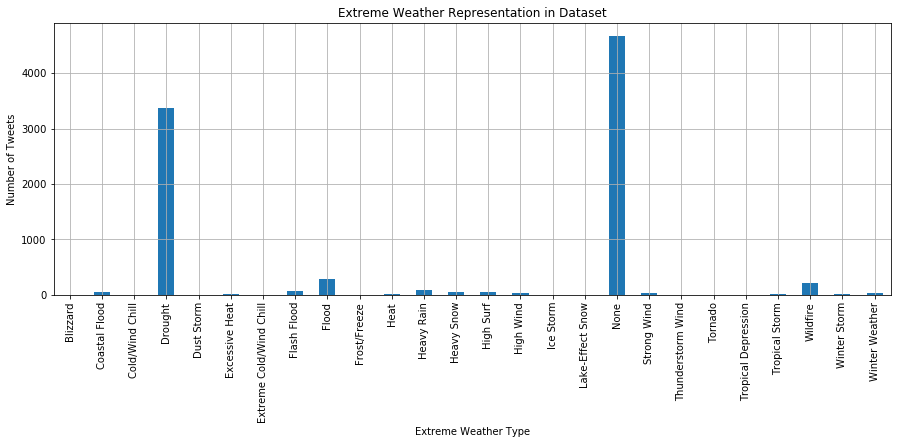

In [24]:
grpd_weather_df['tweet'].count().plot(kind = 'bar', figsize=(15,5))
plt.xlabel('Extreme Weather Type')
plt.ylabel('Number of Tweets')
plt.title('Extreme Weather Representation in Dataset')
plt.grid(True)

plt.show()

In this dataset, we se that most of the tweets have no extreme weather. The second most popular extreme weather is a drought, followed by wildfire.

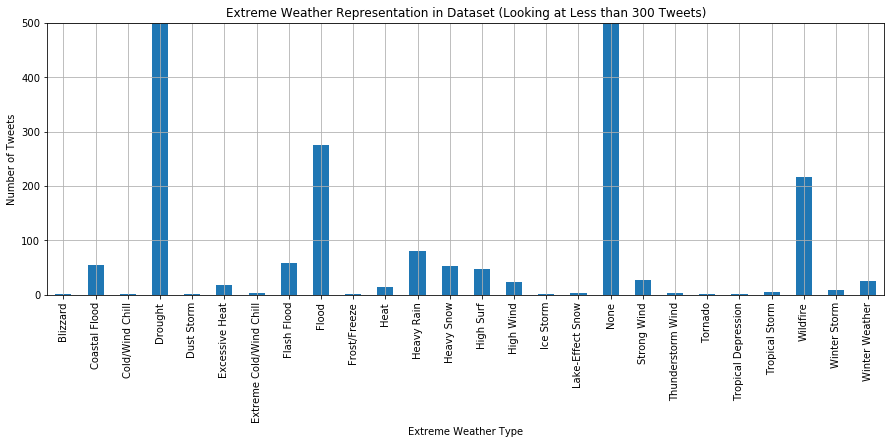

In [25]:
grpd_weather_df['tweet'].count().plot(kind = 'bar', figsize=(15,5))
plt.xlabel('Extreme Weather Type')
plt.ylabel('Number of Tweets')
plt.title('Extreme Weather Representation in Dataset (Looking at Less than 300 Tweets)')
plt.grid(True)
plt.ylim(0,500)
plt.show()

It's also important to look at the less frequent extreme weathers. We see things like rain, wind, snow, and winter weather. These are mostly weather events that occur in the winter (which we would expect since the dataset is said to contain mostly tweets from fall to winter).

In [26]:
grpd_state_df = tweet_weather_df.groupby("STATE")
# grpd_state_df['tweet'].count()

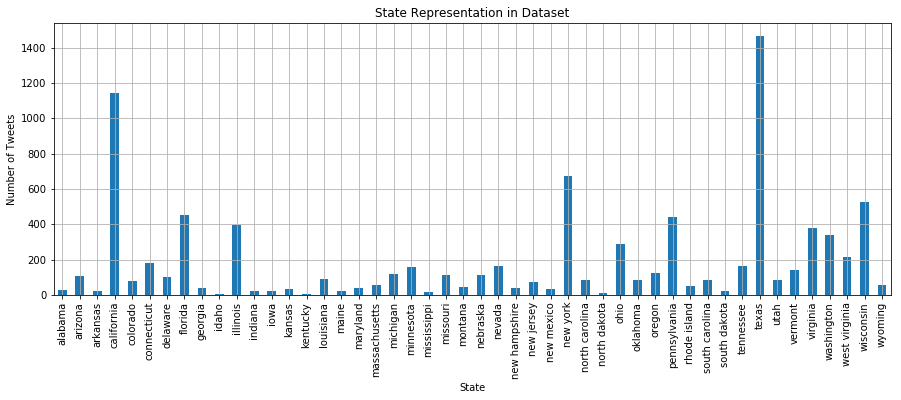

In [27]:
grpd_state_df['tweet'].count().plot(kind = 'bar', figsize=(15,5))
plt.xlabel('State')
plt.ylabel('Number of Tweets')
plt.title('State Representation in Dataset')
plt.grid(True)

plt.show()

There is a large representation of tweets from Texas. California and New York come in second and third. They also have large populations. This is very interesting becaues in previous studies of this data set when I looked at small subsets of tweets (like 50,000) instead of just tweets that contain the word "weather", California was dispropotionally over represented and had a lot more than Texas. 

In [28]:
grpd_storm_df2 = tweet_weather_df.groupby(["STATE","weather_type"])["tweet"].count()

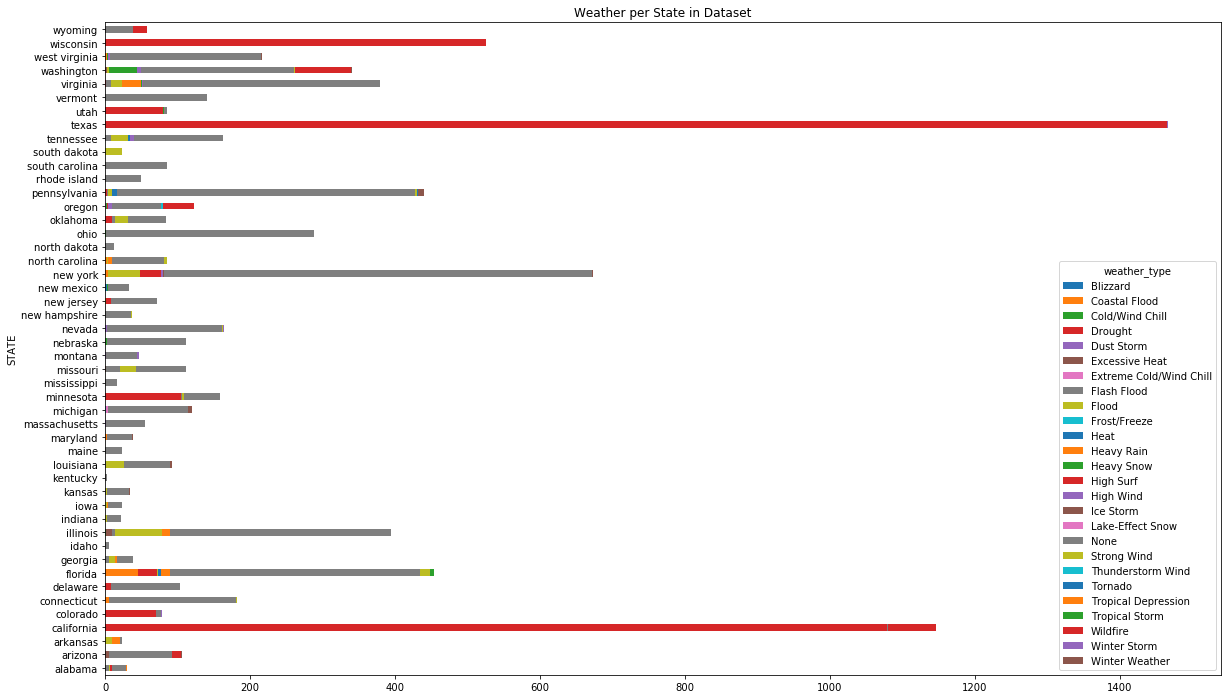

In [29]:
grpd_storm_df2.unstack().plot(kind='barh',stacked=True,title="Weather per State in Dataset", figsize=(20,12))

This graph combines both of the information. We can see that the tweets from California were all during the drought for the most part as well as Texas and even Utah. A lot of the tweets divided by states are not durin an extreme weather event.

## Analysis 

The main technique I will be using to test for the twitter sentiment is by using a dicionary of positive and negative words. This dictionary was created by Jeffrey Breen for twitter sentiment analysis. 
https://github.com/jeffreybreen/twitter-sentiment-analysis-tutorial-201107

From there I plan to sort tweets into positive and negative categories and further compare between the two. 

Using a dictionary and counting the number of words for sentiment analysis suits this case because we are looking for things that hint at a sentiment. However, as a caution, some of the negative words in already have weather attached, such as rainy. 

In [30]:
#loading in the positive and negative lists
pos_list = open("../data_dump/positive_words.txt", encoding='utf-8').read()
neg_list = open("../data_dump/negative_words.txt", encoding='utf-8').read()

In [31]:
tweet_weather_df['text_lc'] = tweet_weather_df['tweet'].str.lower()
tweet_weather_df.dropna(subset=['text_lc'], inplace=True)

In [32]:
tweet_weather_df

,user,STATE,tweet,timestamp,weather_type,text_lc
0,246,california,@Poormojo yes! Do you mean the good weather ea...,2009-11-06 17:28:37,Drought,@poormojo yes! do you mean the good weather ea...
1,246,california,I know three things to be true: SF weather is ...,2009-11-03 19:07:03,Drought,i know three things to be true: sf weather is ...
2,89,california,"Colder weather is kind of exciting, except for...",2009-11-06 20:47:45,Drought,"colder weather is kind of exciting, except for..."
3,89,california,Did anyone tell the weather it's november?,2009-11-03 16:07:24,Drought,did anyone tell the weather it's november?
4,10051,california,"that's METARspeak for ""nice weather""",2009-11-08 13:53:29,Drought,"that's metarspeak for ""nice weather"""
5,10051,california,"Headed to Oakland soon, where the weather is K...",2009-11-08 13:52:09,Drought,"headed to oakland soon, where the weather is k..."
6,10051,california,Deciphering DUAT data. I wonder how many pilot...,2009-11-06 11:27:42,Drought,deciphering duat data. i wonder how many pilot...
7,12263,california,I have a headache. Damn rainy Syracuse weather.,2009-10-07 19:39:32,Drought,i have a headache. damn rainy syracuse weather.
8,12263,california,@chrisspy How are you enjoying your poopy weat...,2009-09-29 13:47:02,Drought,@chrisspy how are you enjoying your poopy weat...
9,12329,california,San Francisco's small coastal weather system w...,2009-10-20 00:49:27,Drought,san francisco's small coastal weather system w...


In [33]:
#tokenize 
tweet_weather_df['text_token'] = tweet_weather_df['text_lc'].apply(word_tokenize)
tweet_weather_df['text_token']

0       [@, poormojo, yes, !, do, you, mean, the, good...
1       [i, know, three, things, to, be, true, :, sf, ...
2       [colder, weather, is, kind, of, exciting, ,, e...
3       [did, anyone, tell, the, weather, it, 's, nove...
4       [that, 's, metarspeak, for, ``, nice, weather,...
5       [headed, to, oakland, soon, ,, where, the, wea...
6       [deciphering, duat, data, ., i, wonder, how, m...
7       [i, have, a, headache, ., damn, rainy, syracus...
8       [@, chrisspy, how, are, you, enjoying, your, p...
9       [san, francisco, 's, small, coastal, weather, ...
10      [it, 's, gon, na, be, rainy, tonight, ..., do,...
11      [venturing, out, into, the, stormy, weather, f...
12      [@, laur, oh, fun, !, peeps, in, hardcore, col...
13      [i, might, curse, sf, weather, during, the, su...
14      [rt, @, stevepohlit, :, all, of, us, could, ta...
15      [mmm, ,, the, perfect, cold-weather, breakfast...
16      [it, 's, sf, weather, in, tucson, today-, it, ...
17      [@, ga

In [34]:
#Removing stopwords
#import the stopwords list

from nltk.corpus import stopwords

stopwords = stopwords.words('english')

tweet_weather_df['text_token_no_stop'] = tweet_weather_df['text_token'].apply(lambda x: [word for word in x if word not in stopwords])
tweet_weather_df['text_token_no_stop']

0       [@, poormojo, yes, !, mean, good, weather, ear...
1       [know, three, things, true, :, sf, weather, am...
2       [colder, weather, kind, exciting, ,, except, w...
3                [anyone, tell, weather, 's, november, ?]
4                 ['s, metarspeak, ``, nice, weather, '']
5       [headed, oakland, soon, ,, weather, koak, 0818...
6       [deciphering, duat, data, ., wonder, many, pil...
7        [headache, ., damn, rainy, syracuse, weather, .]
8       [@, chrisspy, enjoying, poopy, weather, ?, hah...
9       [san, francisco, 's, small, coastal, weather, ...
10      ['s, gon, na, rainy, tonight, ..., really, wan...
11      [venturing, stormy, weather, dim, sum, tea, bu...
12      [@, laur, oh, fun, !, peeps, hardcore, cold, w...
13      [might, curse, sf, weather, summer, ,, ca, n't...
14      [rt, @, stevepohlit, :, us, could, take, lesso...
15      [mmm, ,, perfect, cold-weather, breakfast, coo...
16      ['s, sf, weather, tucson, today-, feels, norma...
17      [@, ga

In [35]:
#Calculate and print the total number of positive & negative words for no stopwords
tweet_weather_df['tokens_pos'] = tweet_weather_df['text_token'].apply(lambda x: [word for word in x if word in pos_list])
tweet_weather_df['pos_count'] = tweet_weather_df['tokens_pos'].apply(len)
tweet_weather_df['tokens_neg'] = tweet_weather_df['text_token'].apply(lambda x: [word for word in x if word in neg_list])
tweet_weather_df['neg_count'] = tweet_weather_df['tokens_neg'].apply(len)

In [36]:
#Calculate and print the total number of positive & negative words
tweet_weather_df['tokens_pos_no_stop'] = tweet_weather_df['text_token_no_stop'].apply(lambda x: [word for word in x if word in pos_list])
tweet_weather_df['pos_count_no_stop'] = tweet_weather_df['tokens_pos'].apply(len)
tweet_weather_df['tokens_neg_no_stop'] = tweet_weather_df['text_token_no_stop'].apply(lambda x: [word for word in x if word in neg_list])
tweet_weather_df['neg_count_no_stop'] = tweet_weather_df['tokens_neg'].apply(len)

In [37]:
# Create a new column that contains the proportion of positive words
tweet_weather_df['pos_count_prop'] = tweet_weather_df['pos_count']/tweet_weather_df['text_token'].apply(len)
tweet_weather_df['neg_count_prop'] = tweet_weather_df['neg_count']/tweet_weather_df['text_token'].apply(len)

In [38]:
# Create a new column that contains the proportion of positive words for NO STOP WORDS
tweet_weather_df['pos_count_prop_no_stop'] = tweet_weather_df['pos_count_no_stop']/tweet_weather_df['text_token_no_stop'].apply(len)
tweet_weather_df['neg_count_prop_no_stop'] = tweet_weather_df['neg_count_no_stop']/tweet_weather_df['text_token_no_stop'].apply(len)
tweet_weather_df

,user,STATE,tweet,timestamp,weather_type,text_lc,text_token,text_token_no_stop,tokens_pos,pos_count,tokens_neg,neg_count,tokens_pos_no_stop,pos_count_no_stop,tokens_neg_no_stop,neg_count_no_stop,pos_count_prop,neg_count_prop,pos_count_prop_no_stop,neg_count_prop_no_stop
0,246,california,@Poormojo yes! Do you mean the good weather ea...,2009-11-06 17:28:37,Drought,@poormojo yes! do you mean the good weather ea...,"[@, poormojo, yes, !, do, you, mean, the, good...","[@, poormojo, yes, !, mean, good, weather, ear...","[do, you, mean, the, good, or, the]",7,"[yes, do, mean, the, or, the, bad]",7,"[mean, good]",7,"[yes, mean, bad]",7,0.350000,0.350000,0.500000,0.500000
1,246,california,I know three things to be true: SF weather is ...,2009-11-03 19:07:03,Drought,i know three things to be true: sf weather is ...,"[i, know, three, things, to, be, true, :, sf, ...","[know, three, things, true, :, sf, weather, am...","[i, know, to, be, sf, is, amazing, new, is, am...",12,"[i, know, three, to, be, true, sf, is, is, and...",11,"[know, sf, amazing, new, amazing, exciting]",12,"[know, three, true, sf, day]",11,0.428571,0.392857,0.571429,0.523810
2,89,california,"Colder weather is kind of exciting, except for...",2009-11-06 20:47:45,Drought,"colder weather is kind of exciting, except for...","[colder, weather, is, kind, of, exciting, ,, e...","[colder, weather, kind, exciting, ,, except, w...","[is, kind, of, exciting, except, for, the, who...",10,"[is, kind, of, for, the, cold, thing]",7,"[kind, exciting, except, whole, thing]",10,"[kind, cold, thing]",7,0.666667,0.466667,1.000000,0.700000
3,89,california,Did anyone tell the weather it's november?,2009-11-03 16:07:24,Drought,did anyone tell the weather it's november?,"[did, anyone, tell, the, weather, it, 's, nove...","[anyone, tell, weather, 's, november, ?]","[did, tell, the, it]",4,"[did, tell, the, it]",4,[tell],4,[tell],4,0.444444,0.444444,0.666667,0.666667
4,10051,california,"that's METARspeak for ""nice weather""",2009-11-08 13:53:29,Drought,"that's metarspeak for ""nice weather""","[that, 's, metarspeak, for, ``, nice, weather,...","['s, metarspeak, ``, nice, weather, '']","[for, nice]",2,[for],1,[nice],2,[],1,0.250000,0.125000,0.333333,0.166667
5,10051,california,"Headed to Oakland soon, where the weather is K...",2009-11-08 13:52:09,Drought,"headed to oakland soon, where the weather is k...","[headed, to, oakland, soon, ,, where, the, wea...","[headed, oakland, soon, ,, weather, koak, 0818...","[to, the, is]",3,"[headed, to, the, is]",4,[],3,[headed],4,0.150000,0.200000,0.187500,0.250000
6,10051,california,Deciphering DUAT data. I wonder how many pilot...,2009-11-06 11:27:42,Drought,deciphering duat data. i wonder how many pilot...,"[deciphering, duat, data, ., i, wonder, how, m...","[deciphering, duat, data, ., wonder, many, pil...","[i, wonder, have, of, for, of, on, a]",8,"[i, how, have, died, of, for, of, on, a]",9,[wonder],8,[died],9,0.320000,0.360000,0.500000,0.562500
7,12263,california,I have a headache. Damn rainy Syracuse weather.,2009-10-07 19:39:32,Drought,i have a headache. damn rainy syracuse weather.,"[i, have, a, headache, ., damn, rainy, syracus...","[headache, ., damn, rainy, syracuse, weather, .]","[i, have, a, rainy]",4,"[i, have, a, headache, damn, rainy]",6,[rainy],4,"[headache, damn, rainy]",6,0.400000,0.600000,0.571429,0.857143
8,12263,california,@chrisspy How are you enjoying your poopy weat...,2009-09-29 13:47:02,Drought,@chrisspy how are you enjoying your poopy weat...,"[@, chrisspy, how, are, you, enjoying, your, p...","[@, chrisspy, enjoying, poopy, weather, ?, hah...","[are, you, enjoying]",3,"[how, are]",2,[enjoying],3,[],2,0.250000,0.166667,0.375000,0.250000
9,12329,california,San Francisco's small coastal weather system w...,2009-10-20 00:49:27,Drought,san francisco's small coastal weather system w...,"[san, francisco, 's, small, coastal, weather, ...","[san, francisco, 's, small, coastal, weather, ...","[san, like, you, to, know]",5,"[san, small, 

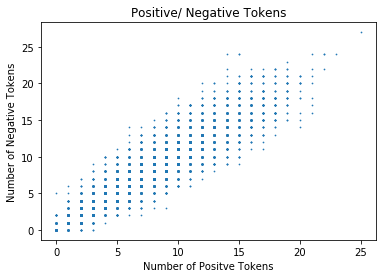

In [75]:
# Just to see the correlation between positive/negative tokens in a tweet. 

plt.scatter(tweet_weather_df['pos_count_no_stop'], tweet_weather_df['neg_count_no_stop'], s = .5)
plt.xlabel('Number of Positve Tokens')
plt.ylabel('Number of Negative Tokens')
plt.title('Positive/ Negative Tokens')

plt.show()

In [39]:
# Looking at what had the highestly positive proportion. 
tweet_weather_df.sort('pos_count_prop', ascending=False)

/Users/laurenyatar/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,user,STATE,tweet,timestamp,weather_type,text_lc,text_token,text_token_no_stop,tokens_pos,pos_count,tokens_neg,neg_count,tokens_pos_no_stop,pos_count_no_stop,tokens_neg_no_stop,neg_count_no_stop,pos_count_prop,neg_count_prop,pos_count_prop_no_stop,neg_count_prop_no_stop
537,15683449,illinois,im spose to be on my way to class but I think ...,2009-09-15 15:09:00,None,im spose to be on my way to class but i think ...,"[im, spose, to, be, on, my, way, to, class, bu...","[im, spose, way, class, think, imma, take, day...","[im, to, be, on, my, way, to, class, but, i, i...",25,"[im, to, be, on, my, way, to, class, but, i, t...",27,"[im, way, class, imma, take, go, sit, beautifu...",25,"[im, way, class, think, imma, take, day, go, s...",27,0.833333,0.900000,1.785714,1.928571
3327,51972994,texas,Loving the weather right now,2009-09-23 08:42:47,Drought,loving the weather right now,"[loving, the, weather, right, now]","[loving, weather, right]","[loving, the, right, now]",4,"[the, right, now]",3,"[loving, right]",4,[right],3,0.800000,0.600000,1.333333,1.000000
1338,18156889,ohio,The weather is not looking too good up here.,2009-11-24 08:04:38,None,the weather is not looking too good up here.,"[the, weather, is, not, looking, too, good, up...","[weather, looking, good, .]","[the, is, not, looking, too, good, up, here]",8,"[the, is, not, too, up, here]",6,"[looking, good]",8,[],6,0.800000,0.600000,2.000000,1.500000
1000,47519990,new york,Great weather here in LA,2009-09-20 13:09:00,None,great weather here in la,"[great, weather, here, in, la]","[great, weather, la]","[great, here, in, la]",4,"[here, in, la]",3,"[great, la]",4,[la],3,0.800000,0.600000,1.333333,1.000000
8464,13607372,ohio,spent his best Fall break in splendid CA weath...,2009-10-14 10:38:22,None,spent his best fall break in splendid ca weath...,"[spent, his, best, fall, break, in, splendid, ...","[spent, best, fall, break, splendid, ca, weath...","[his, best, fall, break, in, splendid, ca]",7,"[his, best, fall, break, in, ca]",6,"[best, fall, break, splendid, ca]",7,"[best, fall, break, ca]",6,0.777778,0.666667,1.000000,0.857143
4520,33661586,tennessee,going run for a while in this beautiful weather,2009-04-22 14:24:38,None,going run for a while in this beautiful weather,"[going, run, for, a, while, in, this, beautifu...","[going, run, beautiful, weather]","[going, run, for, a, while, in, beautiful]",7,"[run, for, a, in]",4,"[going, run, beautiful]",7,[run],4,0.777778,0.444444,1.750000,1.000000
4061,756278,washington,I wonder if smiles can affect the weather?,2009-09-21 07:09:00,None,i wonder if smiles can affect the weather?,"[i, wonder, if, smiles, can, affect, the, weat...","[wonder, smiles, affect, weather, ?]","[i, wonder, if, smiles, can, affect, the]",7,"[i, if, can, affect, the]",5,"[wonder, smiles, affect]",7,[affect],5,0.777778,0.555556,1.400000,1.000000
7253,35365733,pennsylvania,now i think that its time to go and enjoy the ...,2009-11-01 15:13:31,None,now i think that its time to go and enjoy the ...,"[now, i, think, that, its, time, to, go, and, ...","[think, time, go, enjoy, amazing, weather]","[now, i, its, time, to, go, and, enjoy, the, a...",10,"[now, i, think, its, time, to, go, and, the]",9,"[time, go, enjoy, amazing]",10,"[think, time, go]",9,0.769231,0.692308,1.666667,1.500000
646,25426879,new york,Just landed in LA...happy to be safe on the gr...,2009-11-19 13:57:04,None,just landed in la...happy to be safe on the gr...,"[just, landed, in, la, ..., happy, to, be, saf...","[landed, la, ..., happy, safe, ground, beautif...","[just, in, la, happy, to, be, safe, on, the, g...",13,"[just, in, la, happy, to, be, safe, on, the, g...",12,"[la, happy, safe, ground, beautiful]",13,"[la, happy, safe, ground]",12,0.764706,0.705882,1.444444,1.333333
924,23233229,new york,is happy the weather decided to be nicer than ...,2009-05-02 14:19:36,None,is happy the weather decided to be nicer than ...,"[is, happy, the, weather, decided, to, be, nic...","[happy, weather, de

In [40]:
# Looking at what had the highest negative proportion. 
tweet_weather_df.sort('neg_count_prop', ascending=False)

/Users/laurenyatar/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,user,STATE,tweet,timestamp,weather_type,text_lc,text_token,text_token_no_stop,tokens_pos,pos_count,tokens_neg,neg_count,tokens_pos_no_stop,pos_count_no_stop,tokens_neg_no_stop,neg_count_no_stop,pos_count_prop,neg_count_prop,pos_count_prop_no_stop,neg_count_prop_no_stop
537,15683449,illinois,im spose to be on my way to class but I think ...,2009-09-15 15:09:00,None,im spose to be on my way to class but i think ...,"[im, spose, to, be, on, my, way, to, class, bu...","[im, spose, way, class, think, imma, take, day...","[im, to, be, on, my, way, to, class, but, i, i...",25,"[im, to, be, on, my, way, to, class, but, i, t...",27,"[im, way, class, imma, take, go, sit, beautifu...",25,"[im, way, class, think, imma, take, day, go, s...",27,0.833333,0.900000,1.785714,1.928571
3564,19419897,montana,ps im back... still feeling a little under the...,2009-11-02 20:55:25,None,ps im back... still feeling a little under the...,"[ps, im, back, ..., still, feeling, a, little,...","[ps, im, back, ..., still, feeling, little, we...","[ps, im, back, a, under, the, but, in, the, ri...",15,"[ps, im, back, still, feeling, a, little, unde...",24,"[ps, im, back, right, full, head]",15,"[ps, im, back, still, feeling, little, headed,...",24,0.555556,0.888889,0.882353,1.411765
6283,66781233,washington,Tired going to go to bed think I am still unde...,2009-09-20 00:09:00,Wildfire,tired going to go to bed think i am still unde...,"[tired, going, to, go, to, bed, think, i, am, ...","[tired, going, go, bed, think, still, weather]","[going, to, go, to, i, am, under, the]",8,"[tired, to, go, to, bed, think, i, am, still, ...",11,"[going, go]",8,"[tired, go, bed, think, still]",11,0.615385,0.846154,1.142857,1.571429
5022,19741270,pennsylvania,Event is over due to weather,2009-11-14 22:13:22,None,event is over due to weather,"[event, is, over, due, to, weather]","[event, due, weather]","[event, is, over, to]",4,"[event, is, over, due, to]",5,[event],4,"[event, due]",5,0.666667,0.833333,1.333333,1.666667
6366,15738047,texas,I just want some rainless fall weather and to ...,2009-09-19 11:09:00,Drought,i just want some rainless fall weather and to ...,"[i, just, want, some, rainless, fall, weather,...","[want, rainless, fall, weather, spend, day, re...","[i, just, some, fall, and, to, the, to, the]",9,"[i, just, want, some, rainless, fall, and, to,...",14,[fall],9,"[want, rainless, fall, spend, day, next]",14,0.529412,0.823529,1.000000,1.555556
3797,21278837,texas,feeling a wee bit under the weather. I hope I...,2009-09-11 15:09:00,Drought,feeling a wee bit under the weather. i hope i...,"[feeling, a, wee, bit, under, the, weather, .,...","[feeling, wee, bit, weather, ., hope, feel, ok...","[a, wee, bit, under, the, i, hope, i, ok, time]",10,"[feeling, a, wee, bit, under, the, i, hope, i,...",14,"[wee, bit, hope, ok, time]",10,"[feeling, wee, bit, hope, feel, ok, show, time]",14,0.588235,0.823529,0.909091,1.272727
8135,39596916,oklahoma,All this dreary weather has put me in a funky ...,2009-09-13 19:09:00,Flood,all this dreary weather has put me in a funky ...,"[all, this, dreary, weather, has, put, me, in,...","[dreary, weather, put, funky, mood]","[all, has, put, me, in, a]",6,"[all, dreary, has, put, me, in, a, funky, mood]",9,[put],6,"[dreary, put, funky, mood]",9,0.545455,0.818182,1.200000,1.800000
4539,43453299,texas,I hope it rains im tired of this hot weather,2009-06-09 15:11:55,Drought,i hope it rains im tired of this hot weather,"[i, hope, it, rains, im, tired, of, this, hot,...","[hope, rains, im, tired, hot, weather]","[i, hope, it, im, of, hot]",6,"[i, hope, it, rains, im, tired, of, hot]",8,"[hope, im, hot]",6,"[hope, rains, im, tired, hot]",8,0.600000,0.800000,1.000000,1.333333
4049,18473306,washington,feeling more than just a little bit under the ...,2009-09-24 15:29:54,None,feeling more than just a little bit under the ...,"[feeling, more, than, just, a, little, bit, un...","[feeling, little, bit, weather]","[than, just, a, bit, under, the]",6,"[fee

In [41]:
#Looking based off whether there is a difference for stop words vs no stop words
tweet_weather_df['pos_sentiment'] =  tweet_weather_df['pos_count_prop'] >= tweet_weather_df['neg_count_prop']
tweet_weather_df['pos_sentiment_no_stop'] =  tweet_weather_df[
    'pos_count_prop_no_stop'] >= tweet_weather_df['neg_count_prop_no_stop']
pos_tweet_weather_df = tweet_weather_df[['tweet','weather_type','pos_sentiment','pos_sentiment_no_stop']]
pos_tweet_weather_df

,tweet,weather_type,pos_sentiment,pos_sentiment_no_stop
0,@Poormojo yes! Do you mean the good weather ea...,Drought,True,True
1,I know three things to be true: SF weather is ...,Drought,True,True
2,"Colder weather is kind of exciting, except for...",Drought,True,True
3,Did anyone tell the weather it's november?,Drought,True,True
4,"that's METARspeak for ""nice weather""",Drought,True,True
5,"Headed to Oakland soon, where the weather is K...",Drought,False,False
6,Deciphering DUAT data. I wonder how many pilot...,Drought,False,False
7,I have a headache. Damn rainy Syracuse weather.,Drought,False,False
8,@chrisspy How are you enjoying your poopy weat...,Drought,True,True
9,San Francisco's small coastal weather system w...,Drought,True,True


In [42]:
print(pos_tweet_weather_df["pos_sentiment"].value_counts())

pos_tweet_weather_df["pos_sentiment_no_stop"].value_counts()

True     4621
False    4341
Name: pos_sentiment, dtype: int64


True     4621
False    4341
Name: pos_sentiment_no_stop, dtype: int64

Removing stop words from the text did not change the number of positive/ negative tweets. This is likely to be because these are tweets. 

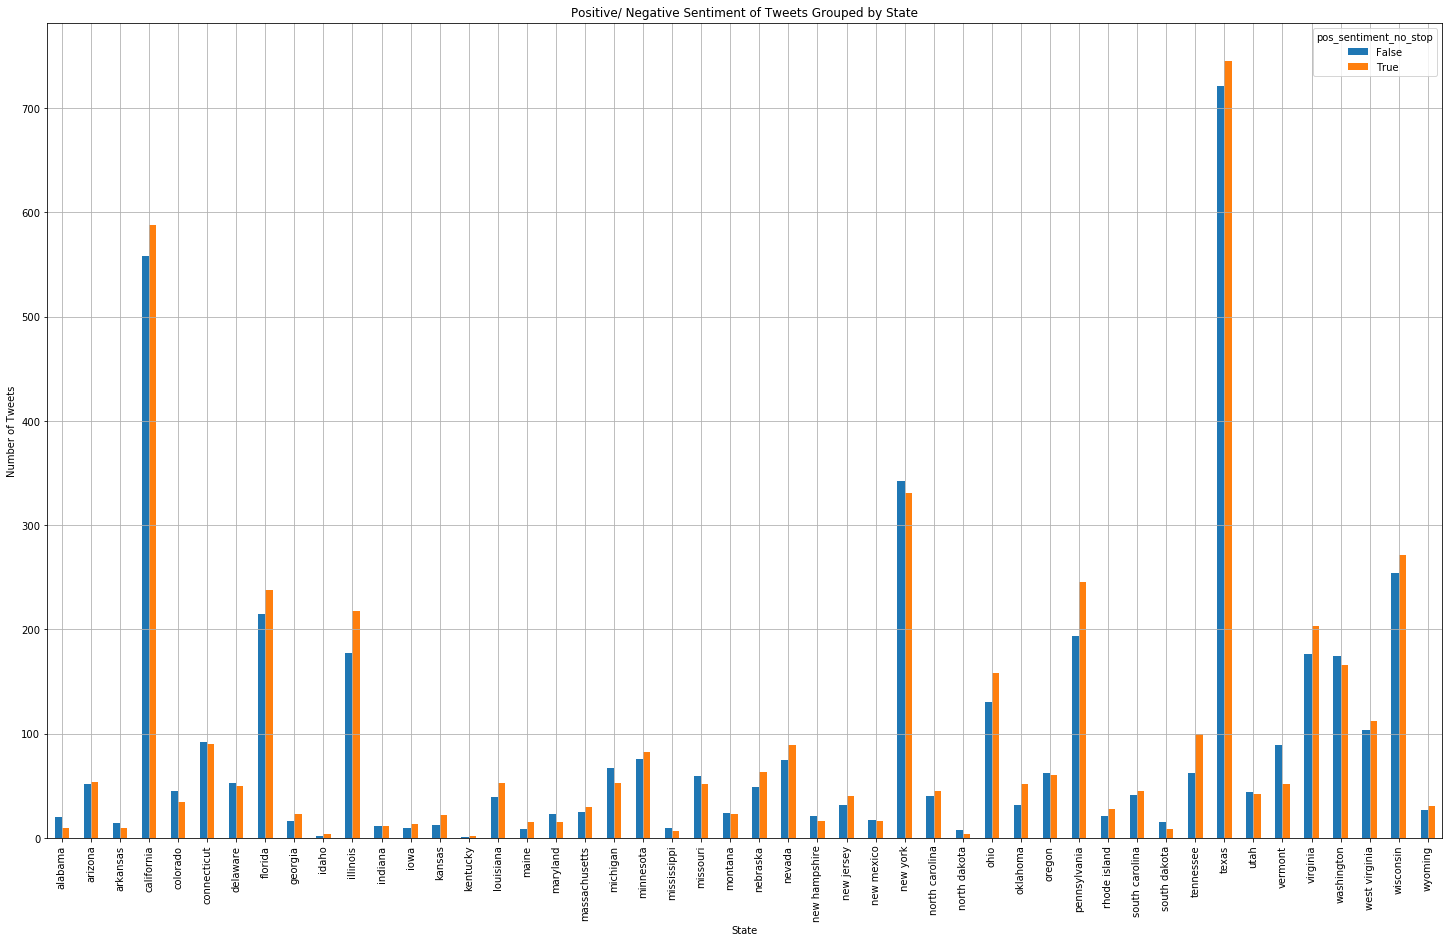

In [43]:
grpd_state_df['pos_sentiment_no_stop'].value_counts().unstack().plot(kind = 'bar', figsize=(25,15))
plt.xlabel('State')
plt.ylabel('Number of Tweets')
plt.title('Positive/ Negative Sentiment of Tweets Grouped by State')
plt.grid(True)

plt.show()

True corresponds to positive sentiment.

In general we see more positive tweets. The porportion of positive to negative aren't too drastic from one another.

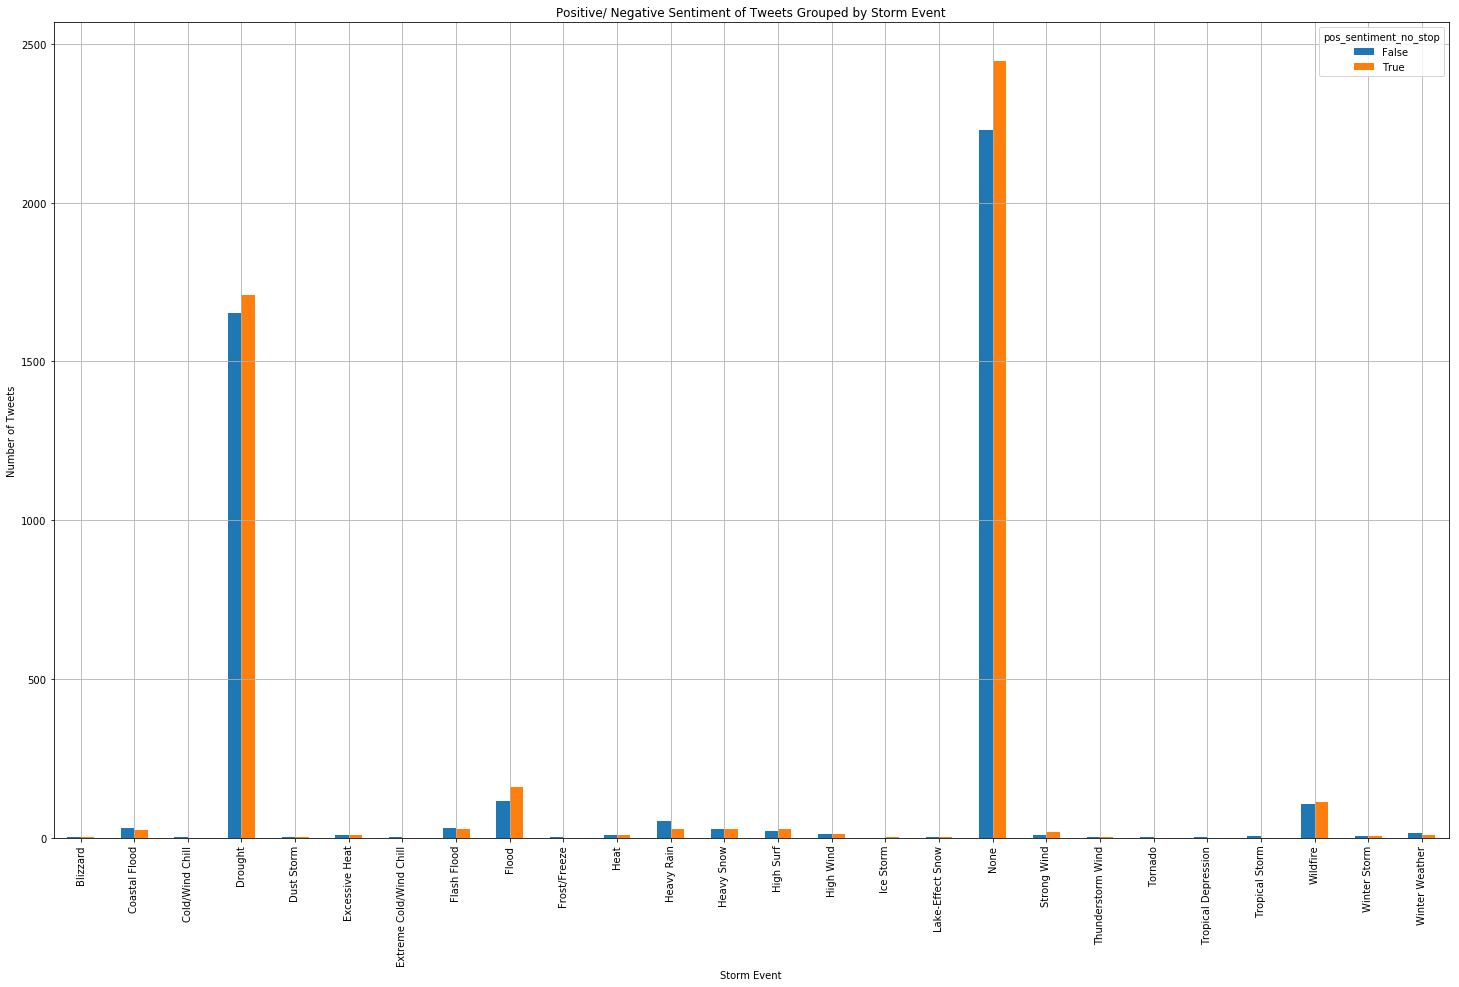

In [44]:
grpd_weather_df['pos_sentiment_no_stop'].value_counts().unstack().plot(kind = 'bar', figsize=(25,15))
plt.xlabel('Storm Event')
plt.ylabel('Number of Tweets')
plt.title('Positive/ Negative Sentiment of Tweets Grouped by Storm Event')
plt.grid(True)

plt.show()

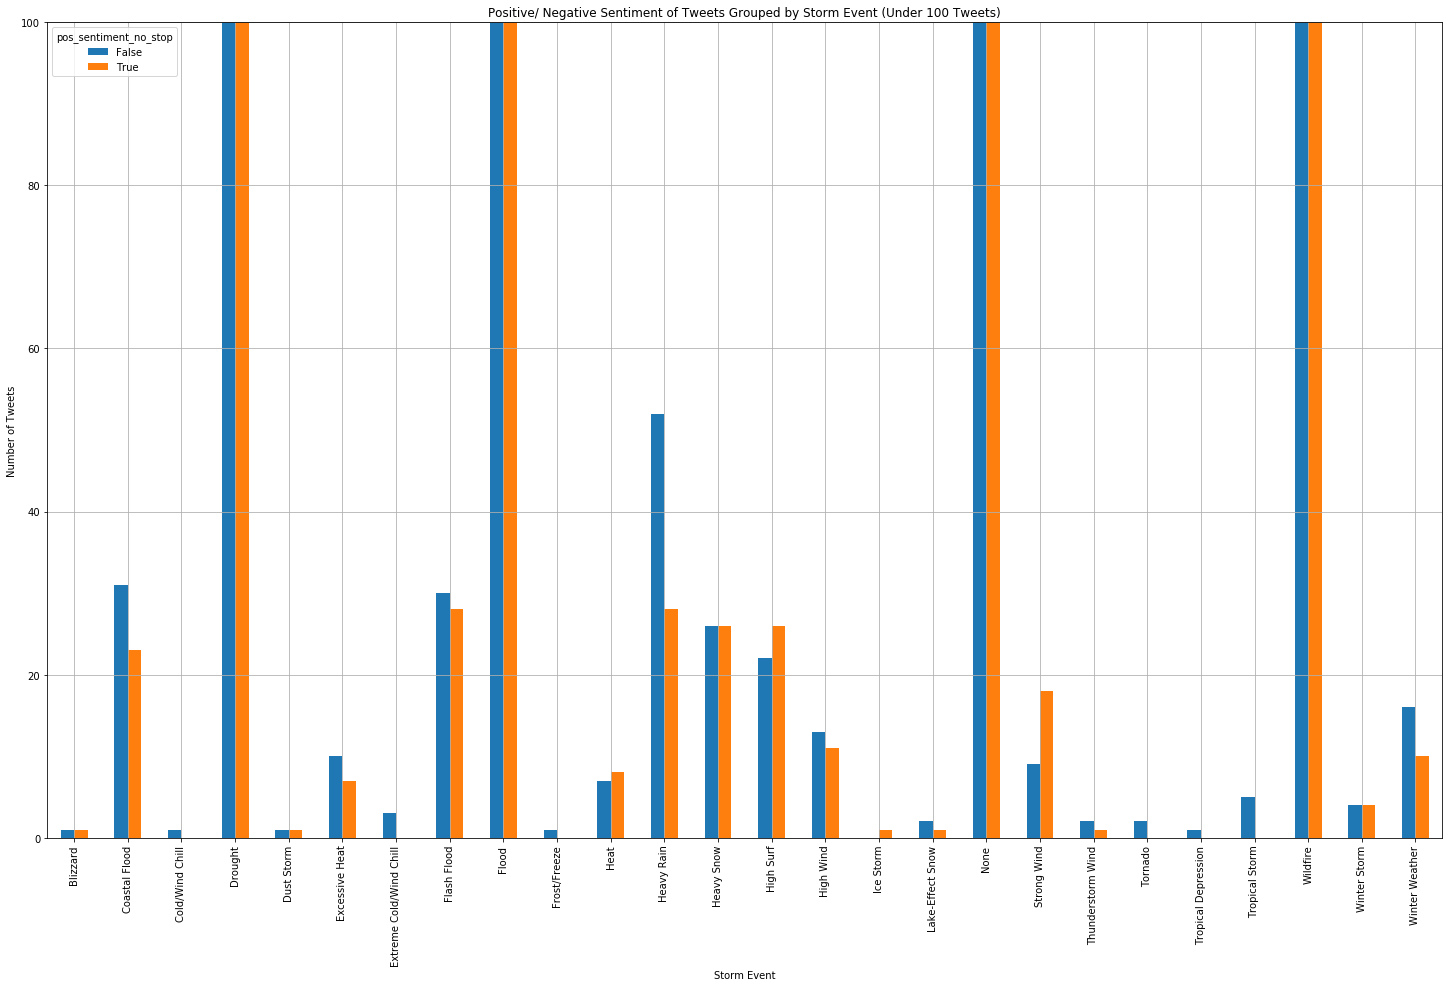

In [45]:
grpd_weather_df['pos_sentiment_no_stop'].value_counts().unstack().plot(kind = 'bar', figsize=(25,15))
plt.xlabel('Storm Event')
plt.ylabel('Number of Tweets')
plt.title('Positive/ Negative Sentiment of Tweets Grouped by Storm Event (Under 100 Tweets)')
plt.grid(True)
plt.ylim(0,100)
plt.show()

For drought and none we see that the same trend that we saw in the states remains. We for the categories that have less than 100 tweets, we that there are cases of more negative tweets. For the ones that have more negative than positive tweets we see heavy rain as having significanly more. Interestingly, heavy rain is one of the few that seems to fall under this trend abd rain is one of the situations where we are most likely to feel sad because of the weather according to studies. Winter weather also has more negative tweets as well as high wind. High wind has more negative tweets but strong wind does not. Those tweets are small so we would have to look at those closely to really see what it's about.

### How many more positive than negative

Right now we only have positive or negative (no neutral). To test what we see in the graphs, we will further check to see if per weather category if there are more positive tweets than negative tweets.

Using the below formula:

#positive/#total - #negative/total

In [46]:
#proportion of positive tweets (based off of token proportions) -  negative tweets / total

print(sum(tweet_weather_df['pos_count_prop'])/(
    sum(tweet_weather_df['pos_count_prop']) + sum(
        tweet_weather_df['neg_count_prop'])))

print(sum(tweet_weather_df['neg_count_prop'])/(
    sum(tweet_weather_df['pos_count_prop']) + sum(tweet_weather_df['neg_count_prop'])))

0.48475776412895966
0.5152422358710403


In [47]:
#grouping each the tweets by weather type we will be looking at more closely

drought_df = tweet_weather_df[tweet_weather_df['weather_type'] == 'Drought']

none_df = tweet_weather_df[tweet_weather_df['weather_type'] == 'None']
flood_df = tweet_weather_df[tweet_weather_df['weather_type'] == 'Flood']
wildfire_df = tweet_weather_df[tweet_weather_df['weather_type'] == 'Wildfire']
heavyrain_df = tweet_weather_df[tweet_weather_df['weather_type'] == 'Heavy Rain']
winter_df = tweet_weather_df[tweet_weather_df['weather_type'] == 'Winter Weather']
wind_df = tweet_weather_df[tweet_weather_df['weather_type'] == 'Strong Wind']
heat_df = tweet_weather_df[tweet_weather_df['weather_type'] == 'Excessive Heat']

In [48]:
weather_type = ['all', 'drought', 'none', 'flood', 'wildfire', 'heavy rain',
                'winter weather', 'strongs winds', 'excessive heat']
proportion = []

#for all tweets
#proportion of positive tweets - negative tweets / total
proportion.append(sum(tweet_weather_df['pos_sentiment'])/len(
    tweet_weather_df) - sum(1-tweet_weather_df['pos_sentiment'])/len(tweet_weather_df))

#for drought
#proportion of positive tweets - negative tweets / total

proportion.append(sum(drought_df['pos_sentiment'])/len(
    drought_df) - sum(1-drought_df['pos_sentiment'])/len(drought_df))

#for none
#proportion of positive tweets - negative tweets / total

proportion.append(sum(none_df['pos_sentiment'])/len(
    none_df) - sum(1-none_df['pos_sentiment'])/len(none_df))

#for flood
#proportion of positive tweets - negative tweets / total

proportion.append(sum(flood_df['pos_sentiment'])/len(
    flood_df) - sum(1-flood_df['pos_sentiment'])/len(flood_df))

#for wildfire
#proportion of positive tweets - negative tweets / total

proportion.append(sum(wildfire_df['pos_sentiment'])/len(
    wildfire_df) - sum(1-wildfire_df['pos_sentiment'])/len(wildfire_df))

#for heavy rain
#proportion of positive tweets - negative tweets / total

proportion.append(sum(heavyrain_df['pos_sentiment'])/len(
    heavyrain_df) - sum(1-heavyrain_df['pos_sentiment'])/len(heavyrain_df))

#for winter
#proportion of positive tweets - negative tweets / total

proportion.append(sum(winter_df['pos_sentiment'])/len(
    heavyrain_df) - sum(1-winter_df['pos_sentiment'])/len(winter_df))

#for wind
#proportion of positive tweets - negative tweets / total

proportion.append(sum(wind_df['pos_sentiment'])/len(
    heavyrain_df) - sum(1-wind_df['pos_sentiment'])/len(wind_df))

#excess heat
proportion.append(sum(heat_df['pos_sentiment'])/len(
    heavyrain_df) - sum(1-heat_df['pos_sentiment'])/len(heat_df))
proportion

[0.031243026110243211,
 0.01665675193337296,
 0.046640992725716757,
 0.16666666666666669,
 0.023041474654377891,
 -0.30000000000000004,
 -0.49038461538461542,
 -0.10833333333333331,
 -0.50073529411764706]

In [49]:
proportions = pd.Series(proportion, index=weather_type)
proportions

all               0.031243
drought           0.016657
none              0.046641
flood             0.166667
wildfire          0.023041
heavy rain       -0.300000
winter weather   -0.490385
strongs winds    -0.108333
excessive heat   -0.500735
dtype: float64

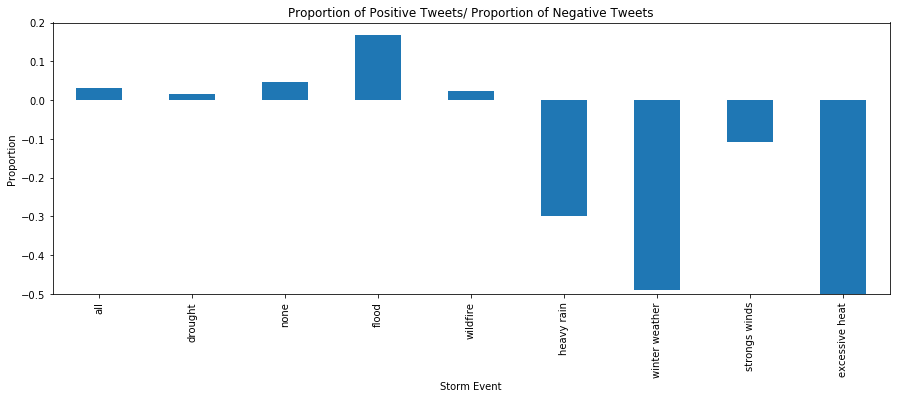

In [50]:
proportions.plot(kind = 'bar', figsize=(15,5))
plt.xlabel('Storm Event')
plt.ylabel('Proportion')
plt.title('Proportion of Positive Tweets/ Proportion of Negative Tweets')

I chose a select few to take a look at. We can see in the "all", which looks at all of tweets that the difference between positive/negative isn't that large, but for more exreme weather such as heavy rain, winter weather, and excessive heat we see more negative tweets. It's interest to see that winter weather and extreme heat both have portionally more negative tweets despite being two temperatures. This supports the idea that extreme weather affects what people are tweeting about based only on these proportions.

## DTM

We will continue to do some tests on this dataset. Furthermore, it is useful to see if there is any similarity in the types of words that are used in each weather group and if there is a change in words dependings on storm event group. First we will check to see the frequency of terms. 

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer(stop_words="english")

countvec.fit_transform(tweet_weather_df['tweet'])

tweets_df = pd.DataFrame(countvec.fit_transform(
    tweet_weather_df['tweet']).toarray(), columns=countvec.get_feature_names())
tweets_df

,00,000,0002,00am,00in,00pm,01in,02,021,0252,...,zq,zqowl,zrul5,zuma,zvjyj,zxv8s,zz,zzif,zzzzzz,zzzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
#most frequent words
print(tweets_df.sum().sort_values(ascending=False))

most_freq = tweets_df.sum().sort_values(ascending=False)[:100]


#average times a word is used in a document
print(tweets_df.mean().sort_values(ascending=False))


weather            7488
http               1510
mayweather         1152
today               873
bit                 736
ly                  712
com                 706
great               693
day                 636
good                616
cold                615
rt                  604
just                542
like                528
love                429
rain                424
nice                422
perfect             408
beautiful           389
fall                385
time                354
tonight             345
fight               336
going               311
weekend             311
morning             286
marquez             276
hot                 247
www                 246
warm                240
                   ... 
mer                   1
mequon                1
mentioned             1
mentalhealth          1
mens                  1
metcheck              1
meteorologists        1
michaelellison3       1
mh725                 1
michaeldcarney        1
michaeldavsmith 

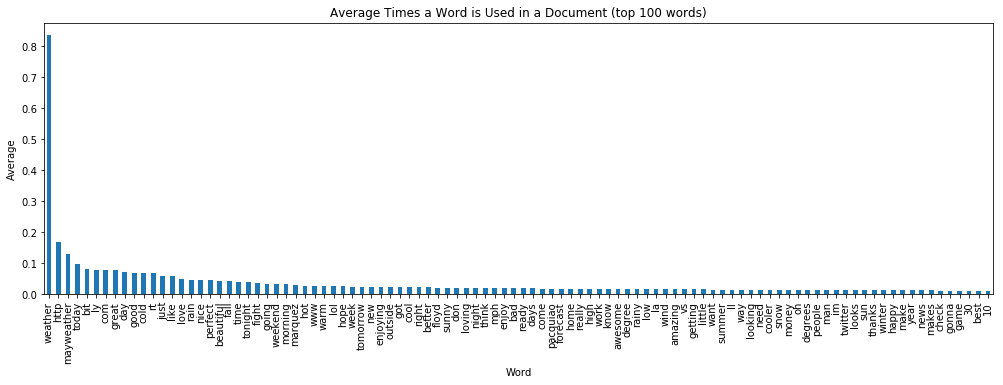

In [90]:
t2 = pd.Series(tweets_df.mean().sort_values(ascending=False)[:100])
t2.plot(kind = 'bar', figsize=(17,5))

plt.xlabel('Word')
plt.ylabel('Average')
plt.title('Average Times a Word is Used in a Document (top 100 words)')

When we inpect the words used throughout the corpus we can see that obviously weather is the most frequent because we used the term "weather" to pull the tweets to look at. This method also pulled out "Mayweather" as well so we have tweets about the Mayweather and all of his fights mixed up in this (which is why fight and other fighters are prevalent in this text, but aside from that we words that generally describe the weather such as cold and rain. The top words are "great, good, like, love, perfect, beautiful, warm, hot, sunny, and loving" Generally we are seeing more positive words than I expected. We do get words like "cold, rain, bad, low, cooler, and snow, but from a glance, surprisingly, we see a lot more positivity. 

#### Similarity between Tokens

In [53]:
drought_list = drought_df["tweet"].tolist()
none_list = none_df["tweet"].tolist()
flood_list = flood_df["tweet"].tolist()
wildfire_list = wildfire_df["tweet"].tolist()
heavyrain_list = heavyrain_df["tweet"].tolist()
winter_list = winter_df["tweet"].tolist()
wind_list = wind_df["tweet"].tolist()
heat_list = heat_df["tweet"].tolist()


In [54]:
drought_string = str(drought_list)
none_string = str(none_list)
flood_string = str(flood_list)
wildfire_string = str(wildfire_list)

heavyrain_string = str(heavyrain_list)
winter_string = str(winter_list)
wind_string = str(wind_list)
heat_string = str(heat_list)

In [55]:
text_list = []
text_list.append(drought_string)
text_list.append(none_string)
text_list.append(flood_string)
text_list.append(wildfire_string)

text_list.append(heavyrain_string)
text_list.append(winter_string)
text_list.append(wind_string)
text_list.append(heat_string)


In [56]:
#dtm matrix to compare the weather types 
# 0: drought
# 1: none
# 2: flood   
# 3: wildfire
# 4: heavy rain
# 5: winter storms
# 6: high winds
# 7: extreme heat


countvec = CountVectorizer(stop_words="english")

tweet_df = pd.DataFrame(countvec.fit_transform(text_list).toarray(), columns=countvec.get_feature_names())
tweet_df

,00,000,0002,00am,00in,00pm,01in,02,021,0252,...,zq,zqowl,zrul5,zuma,zvjyj,zxv8s,zz,zzif,zzzzzz,zzzzzzzzzzzzzzz
0,7,3,0,0,21,2,1,0,1,0,...,0,0,0,0,1,0,2,0,1,0
1,21,4,0,5,2,8,8,1,0,0,...,0,0,1,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,4,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [57]:
columns = list(tweet_df)
chi_list = []

for c in columns:
    chi_list.append([c,((tweet_df.loc[0,c] - tweet_df[c].sum(
        axis=0)/2)**2 / tweet_df[c].sum(axis=0)/2) + ((
        tweet_df.loc[1,c] - tweet_df[c].sum(axis=0)/2)**2 / tweet_df[c].sum(axis=0)/2)])

In [92]:
chi_list[:10]

[['00', 1.75],
 ['000', 0.38636363636363641],
 ['0002', 0.25],
 ['00am', 1.25],
 ['00in', 3.9239130434782608],
 ['00pm', 0.90000000000000002],
 ['01in', 1.3611111111111112],
 ['02', 0.25],
 ['021', 0.25],
 ['0252', 0.25]]

In [93]:
chi_list.sort(key=lambda x: x[1], reverse=True)
chi_list[:100]

[['weather', 74.185404068169333],
 ['mph', 27.84090909090909],
 ['data', 20.261764705882353],
 ['pct', 15.313218390804598],
 ['example', 14.765873015873016],
 ['twitter', 12.027777777777779],
 ['great', 11.911481481481482],
 ['pm', 11.841954022988507],
 ['http', 11.373728813559321],
 ['today', 10.523696682464456],
 ['wind', 10.181654676258994],
 ['bit', 9.0211511789181689],
 ['ly', 8.6732424677187954],
 ['fall', 8.2960526315789469],
 ['san', 7.5983146067415728],
 ['north', 7.5089285714285712],
 ['time', 7.2573746312684371],
 ['forecast', 6.4197530864197532],
 ['houston', 6.3289473684210531],
 ['sf', 6.25],
 ['chicago', 6.1479591836734695],
 ['gorgeous', 5.9127906976744189],
 ['vegas', 5.8895348837209305],
 ['nyc', 5.8729508196721305],
 ['weekend', 5.8500000000000005],
 ['atlanta', 5.7905405405405403],
 ['45', 5.7647058823529411],
 ['rt', 5.6056701030927831],
 ['51', 5.5384615384615383],
 ['sse', 5.5],
 ['seattle', 5.4618644067796609],
 ['58', 5.4596774193548381],
 ['steady', 5.38793103

In [94]:
#dtm matrix to compare the weather types 
# 0: drought
# 1: none
# 2: flood   
# 3: wildfire
# 4: heavy rain
# 5: winter storms
# 6: high winds
# 7: extreme heat

vectorizer = CountVectorizer(encoding='utf-8',stop_words='english') 
dtm = vectorizer.fit_transform(text_list).toarray()
dtm

array([[ 7,  3,  0, ...,  0,  1,  0],
       [21,  4,  0, ...,  0,  0,  1],
       [ 0,  0,  1, ...,  0,  0,  0],
       ..., 
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [103]:
from sklearn.metrics.pairwise import euclidean_distances
euc_dist = euclidean_distances(dtm)

print("\nDistance between none and drought")
print(euc_dist[1, 0])

print("\nDistance between none and flood")
print(euc_dist[1, 2])

print("\nDistance between none and wildfire")
print(euc_dist[1, 3])

print("\nDistance between drought and wildfire")
print(euc_dist[0, 3])

print("\nDistance between drought and flood")
print(euc_dist[0, 2])

print("\nDistance between none and heavy rain")
print(euc_dist[1, 4])

print("\nDistance between none and winter storms")
print(euc_dist[1, 5])

print("\nDistance between none and high winds")
print(euc_dist[1, 6])

print("\nDistance between none and extreme heat")
print(euc_dist[1, 7])

print("\nDistance between winter storms and extreme heat")
print(euc_dist[5, 7])

print("\nDistance between extreme heat and drought")
print(euc_dist[7, 0])


Distance between none and drought
1532.70675604

Distance between none and flood
4194.91632813

Distance between none and wildfire
4290.91528698

Distance between drought and wildfire
2842.30610596

Distance between drought and flood
2751.99509447

Distance between none and heavy rain
4401.52723495

Distance between none and winter storms
4449.65133466

Distance between none and high winds
4452.62169963

Distance between none and extreme heat
4461.77341424

Distance between winter storms and extreme heat
25.5538646784

Distance between extreme heat and drought
3014.70164361


Just testing a few of these for their euclidean distance, we can see that comparing the "none" tweets (tweets when there is no extreme weather) to these select extreme weathers, we see the greatest distance when looking at storm events that produce more simuli (rain,snow, wind, more heat) than drought. In addition, when we look at the distance between winter storms and extreme heat, it is very small even though the weather conditions are quite different. Looking at extreme heat and drought, which both suggest hot weather we still see a large difference. 

From this, it further suggests that it is not really a matter of being cold, but that the weather is extreme or different from the norm.

## Word2Vec

To get a better sense of what the words are we will use Word2Vec to look at the similarity between words through out the document.

In [106]:
import gensim #library needed for word2vec

In [115]:
tweet_weather_df

,user,STATE,tweet,timestamp,weather_type,text_lc,text_token,text_token_no_stop,tokens_pos,pos_count,...,tokens_pos_no_stop,pos_count_no_stop,tokens_neg_no_stop,neg_count_no_stop,pos_count_prop,neg_count_prop,pos_count_prop_no_stop,neg_count_prop_no_stop,pos_sentiment,pos_sentiment_no_stop
0,246,california,@Poormojo yes! Do you mean the good weather ea...,2009-11-06 17:28:37,Drought,@poormojo yes! do you mean the good weather ea...,"[@, poormojo, yes, !, do, you, mean, the, good...","[@, poormojo, yes, !, mean, good, weather, ear...","[do, you, mean, the, good, or, the]",7,...,"[mean, good]",7,"[yes, mean, bad]",7,0.350000,0.350000,0.500000,0.500000,True,True
1,246,california,I know three things to be true: SF weather is ...,2009-11-03 19:07:03,Drought,i know three things to be true: sf weather is ...,"[i, know, three, things, to, be, true, :, sf, ...","[know, three, things, true, :, sf, weather, am...","[i, know, to, be, sf, is, amazing, new, is, am...",12,...,"[know, sf, amazing, new, amazing, exciting]",12,"[know, three, true, sf, day]",11,0.428571,0.392857,0.571429,0.523810,True,True
2,89,california,"Colder weather is kind of exciting, except for...",2009-11-06 20:47:45,Drought,"colder weather is kind of exciting, except for...","[colder, weather, is, kind, of, exciting, ,, e...","[colder, weather, kind, exciting, ,, except, w...","[is, kind, of, exciting, except, for, the, who...",10,...,"[kind, exciting, except, whole, thing]",10,"[kind, cold, thing]",7,0.666667,0.466667,1.000000,0.700000,True,True
3,89,california,Did anyone tell the weather it's november?,2009-11-03 16:07:24,Drought,did anyone tell the weather it's november?,"[did, anyone, tell, the, weather, it, 's, nove...","[anyone, tell, weather, 's, november, ?]","[did, tell, the, it]",4,...,[tell],4,[tell],4,0.444444,0.444444,0.666667,0.666667,True,True
4,10051,california,"that's METARspeak for ""nice weather""",2009-11-08 13:53:29,Drought,"that's metarspeak for ""nice weather""","[that, 's, metarspeak, for, ``, nice, weather,...","['s, metarspeak, ``, nice, weather, '']","[for, nice]",2,...,[nice],2,[],1,0.250000,0.125000,0.333333,0.166667,True,True
5,10051,california,"Headed to Oakland soon, where the weather is K...",2009-11-08 13:52:09,Drought,"headed to oakland soon, where the weather is k...","[headed, to, oakland, soon, ,, where, the, wea...","[headed, oakland, soon, ,, weather, koak, 0818...","[to, the, is]",3,...,[],3,[headed],4,0.150000,0.200000,0.187500,0.250000,False,False
6,10051,california,Deciphering DUAT data. I wonder how many pilot...,2009-11-06 11:27:42,Drought,deciphering duat data. i wonder how many pilot...,"[deciphering, duat, data, ., i, wonder, how, m...","[deciphering, duat, data, ., wonder, many, pil...","[i, wonder, have, of, for, of, on, a]",8,...,[wonder],8,[died],9,0.320000,0.360000,0.500000,0.562500,False,False
7,12263,california,I have a headache. Damn rainy Syracuse weather.,2009-10-07 19:39:32,Drought,i have a headache. damn rainy syracuse weather.,"[i, have, a, headache, ., damn, rainy, syracus...","[headache, ., damn, rainy, syracuse, weather, .]","[i, have, a, rainy]",4,...,[rainy],4,"[headache, damn, rainy]",6,0.400000,0.600000,0.571429,0.857143,False,False
8,12263,california,@chrisspy How are you enjoying your poopy weat...,2009-09-29 13:47:02,Drought,@chrisspy how are you enjoying your poopy weat...,"[@, chrisspy, how, are, you, enjoying, your, p...","[@, chrisspy, enjoying, poopy, weather, ?, hah...","[are, you, enjoying]",3,...,[enjoying],3,[],2,0.250000,0.166667,0.375000,0.250000,True,True
9,12329,california,San Francisco's small coastal weather system w...,2009-10-20 00:49:27,Drought,san francisco's small coastal weather system w...,"[san, francisco, 's, small, coastal, weather, ...","[san, francisco, 's, small, coastal, weather, ...","[san, like, you, to, know]",5,...,"[san, like, know]",5,"[san, small, like, know]",5,0.294118,0.294118,0.357143,0.357143,True,True


In [117]:
tweet_weather_df['text_token_no_stop'][0]

['@',
 'poormojo',
 'yes',
 '!',
 'mean',
 'good',
 'weather',
 'earlier',
 'week',
 ',',
 'bad',
 'weather',
 'today',
 '?']

In [120]:
model = gensim.models.Word2Vec(tweet_weather_df['text_token_no_stop'], size=100, window=5, \
                               min_count=1, sg=1, alpha=0.025, iter=5, batch_words=10000, workers=1)

In [121]:
model['weather']

array([ -8.24718714e-01,   1.23236634e-01,  -9.65558812e-02,
        -6.74653426e-02,   1.24649487e-01,  -3.54572743e-01,
        -1.69700965e-01,  -1.71740904e-01,  -1.28256246e-01,
        -2.16373679e-04,   2.26297289e-01,   7.51534462e-01,
        -2.07293898e-01,  -1.35759458e-01,  -1.33115649e-02,
         1.18149079e-01,   6.11627549e-02,  -3.70076388e-01,
        -4.59838212e-01,  -2.24420831e-01,   1.10585399e-01,
        -2.62990326e-01,   2.50917405e-01,   3.09526682e-01,
        -1.31601766e-01,  -3.63719940e-01,   5.80810130e-01,
        -2.76390463e-01,   1.41427383e-01,  -1.93844870e-01,
         1.86466560e-01,  -6.49187624e-01,   2.08626360e-01,
        -1.09357163e-01,  -3.30853969e-01,   2.33319700e-01,
        -1.88547581e-01,   2.84110397e-01,  -1.11485064e-01,
         6.34510338e-01,   4.66786742e-01,   4.64633763e-01,
         2.67983794e-01,  -2.18986407e-01,   1.83581308e-01,
        -1.79312766e-01,   1.24072894e-01,  -4.65504259e-01,
         5.72209954e-01,

In [125]:
model.similarity('rain','bad')

0.87282523811462098

In [122]:
model.most_similar('weather')

[('morning', 0.9334481954574585),
 ('day', 0.9316697120666504),
 ('fall', 0.9183790683746338),
 ('outside', 0.9173950552940369),
 ('feels', 0.9131053686141968),
 ('days', 0.9109067916870117),
 ('today', 0.9101438522338867),
 ('san', 0.9083523750305176),
 ('right', 0.9026468396186829),
 ('fun', 0.9015488624572754)]

Throughout the whole text, we find that the most similar words to weather talking about times of the day and how they feel. Overwall, it still feeds positive as we see fun. The "san" is most likely to be refering to San Francisco as a few of the tweets in the corpus talk about San Francisco weather.

In [179]:
model.most_similar(['great','good','love','like','perfect'])

[('first', 0.9972670078277588),
 ('almost', 0.9964563250541687),
 ('hoping', 0.9961565732955933),
 ('awesome', 0.996103048324585),
 ('texas', 0.9955361485481262),
 ('hopefully', 0.9955282211303711),
 ('least', 0.9951756000518799),
 ('walk', 0.9950122833251953),
 ('autumn', 0.9949720501899719),
 ('florida', 0.9949426651000977)]

### Hot/ Cold and their Similar Words

In [175]:
model.most_similar('hot')

[('summer', 0.9953012466430664),
 ('gloomy', 0.9898565411567688),
 ('though', 0.9893235564231873),
 ('makes', 0.9888485670089722),
 ('bit', 0.9879348278045654),
 ('miami', 0.9877747297286987),
 ('autumn', 0.9873327016830444),
 ('start', 0.9872009754180908),
 ('feeling', 0.987189531326294),
 ('long', 0.9870567321777344)]

In [174]:
model.most_similar('cold')

[('makes', 0.9905673861503601),
 ('hate', 0.9901434779167175),
 ('crazy', 0.9870896339416504),
 ('winter', 0.986437201499939),
 ('soon', 0.9862154126167297),
 ('really', 0.9855902194976807),
 ('supposed', 0.9851499795913696),
 ('gets', 0.9847967028617859),
 ('miami', 0.9847962260246277),
 ('actually', 0.9847421646118164)]

In addition, I hand pulled some of the positive sounding terms from the top 100 terms that were used to see what type of words would be similar and to see if a type of weather is described. We don't get a lot of weather terms but we see mentions of Texas, Florida, and Autumn. 

In [131]:
model.most_similar(['autumn'])

[('gloomy', 0.9980695843696594),
 ('walk', 0.9976069331169128),
 ('gorgeous', 0.9974387288093567),
 ('chicago', 0.9974325299263),
 ('finally', 0.997023344039917),
 ('wonderful', 0.9968777894973755),
 ('another', 0.9964989423751831),
 ('bit', 0.9964617490768433),
 ('long', 0.9962244033813477),
 ('family', 0.9960192441940308)]

But the most similar word to autumn appears to be gloomy though gorgeous is also quite popular. People must have mixed views about autumn.

In [133]:
model.most_similar(['winter'])

[('gets', 0.997512698173523),
 ('crazy', 0.9968133568763733),
 ('sweater', 0.9961380958557129),
 ('things', 0.9957886934280396),
 ('thing', 0.9955182075500488),
 ('change', 0.9954789876937866),
 ('thinking', 0.995445191860199),
 ('since', 0.9952875375747681),
 ('actually', 0.9952743053436279),
 ('tired', 0.9950648546218872)]

In [136]:
model.most_similar(positive=['autumn','gloomy'], negative=['winter'])

#if autumn is gloomy then winter is wonderful?

[('wonderful', 0.9921301007270813),
 ('beautiful', 0.9911730885505676),
 ('70', 0.9903469681739807),
 ('outside', 0.9892438054084778),
 ('days', 0.9884883165359497),
 ('gorgeous', 0.9881118535995483),
 ('loving', 0.9873714447021484),
 ('finally', 0.987127423286438),
 ('nice', 0.9868373274803162),
 ('chilly', 0.9866946339607239)]

In [140]:
model.most_similar('hot')

[('summer', 0.9953012466430664),
 ('gloomy', 0.9898565411567688),
 ('though', 0.9893235564231873),
 ('makes', 0.9888485670089722),
 ('bit', 0.9879348278045654),
 ('miami', 0.9877747297286987),
 ('autumn', 0.9873327016830444),
 ('start', 0.9872009754180908),
 ('feeling', 0.987189531326294),
 ('long', 0.9870567321777344)]

In [142]:
model.most_similar('cold')

[('makes', 0.9905673861503601),
 ('hate', 0.9901434779167175),
 ('crazy', 0.9870896339416504),
 ('winter', 0.986437201499939),
 ('soon', 0.9862154126167297),
 ('really', 0.9855902194976807),
 ('supposed', 0.9851499795913696),
 ('gets', 0.9847967028617859),
 ('miami', 0.9847962260246277),
 ('actually', 0.9847421646118164)]

In [144]:
model.most_similar('feeling')

[('bit', 0.9973349571228027),
 ('gloomy', 0.9969573616981506),
 ('autumn', 0.9959544539451599),
 ('almost', 0.9955013990402222),
 ('chicago', 0.9953473806381226),
 ('walk', 0.9948968887329102),
 ('long', 0.9947184920310974),
 ('little', 0.9945127964019775),
 ('running', 0.9943758249282837),
 ('nice', 0.9943681359291077)]

Lastly, to see how really similar the specific storm events I was looking at, I will pull out the ten most frequent word from some of the storm events and compare.

In [171]:
drought_df_model = gensim.models.Word2Vec(tweet_weather_df['text_token_no_stop'], size=100, window=5, \
                               min_count=1, sg=1, alpha=0.025, iter=5, batch_words=10000, workers=1)
drought_df_model.most_similar('weather')

[('morning', 0.9334481954574585),
 ('day', 0.9316697120666504),
 ('fall', 0.9183790683746338),
 ('outside', 0.9173950552940369),
 ('feels', 0.9131053686141968),
 ('days', 0.9109067916870117),
 ('today', 0.9101438522338867),
 ('san', 0.9083523750305176),
 ('right', 0.9026468396186829),
 ('fun', 0.9015488624572754)]

In [172]:
flood_df_model = gensim.models.Word2Vec(flood_df['text_token_no_stop'], size=100, window=5, \
                               min_count=1, sg=1, alpha=0.025, iter=5, batch_words=10000, workers=1)

flood_df_model.most_similar('weather')

#this one is very strange. this might be due to how many tweets are in the batch

[(',', 0.9995540380477905),
 ('.', 0.9995375871658325),
 (':', 0.999116063117981),
 ('today', 0.9990510940551758),
 ('!', 0.9990131258964539),
 ("'s", 0.9987799525260925),
 ('day', 0.9987100958824158),
 ('?', 0.9986592531204224),
 ('http', 0.9986432194709778),
 ('...', 0.99849933385849)]

In [173]:
heat_df_model = gensim.models.Word2Vec(heat_df['text_token_no_stop'], size=100, window=5, \
                               min_count=1, sg=1, alpha=0.025, iter=5, batch_words=10000, workers=1)

heat_df_model.most_similar('weather')

# The similarities are quite low.

[('perfect', 0.248020738363266),
 ('love', 0.22404006123542786),
 ('cooky', 0.20828057825565338),
 ('edge', 0.20728930830955505),
 ('program', 0.19253337383270264),
 ('wedding', 0.19103045761585236),
 ('delay', 0.18111152946949005),
 ('storm', 0.1795734465122223),
 ('day', 0.16659152507781982),
 ('uk', 0.1663854569196701)]

In [169]:
wind_df_model = gensim.models.Word2Vec(wind_df['text_token_no_stop'], size=100, window=5, \
                               min_count=1, sg=1, alpha=0.025, iter=5, batch_words=10000, workers=1)

wind_df_model.most_similar('weather')

[("'m", 0.33575552701950073),
 ('hendersonville', 0.28156983852386475),
 ('til', 0.27901703119277954),
 ('nice', 0.25954470038414),
 ('gettin', 0.2571380138397217),
 ('defeat', 0.2511098086833954),
 ('perfect', 0.25108253955841064),
 ('danecook', 0.2431430220603943),
 ('!', 0.2421872615814209),
 ('storm', 0.2396981120109558)]

In [170]:
winter_listmodel = gensim.models.Word2Vec(wind_df['text_token_no_stop'], size=100, window=5, \
                               min_count=1, sg=1, alpha=0.025, iter=5, batch_words=10000, workers=1)

winter_listmodel.most_similar('weather')

[("'m", 0.33575552701950073),
 ('hendersonville', 0.28156983852386475),
 ('til', 0.27901703119277954),
 ('nice', 0.25954470038414),
 ('gettin', 0.2571380138397217),
 ('defeat', 0.2511098086833954),
 ('perfect', 0.25108253955841064),
 ('danecook', 0.2431430220603943),
 ('!', 0.2421872615814209),
 ('storm', 0.2396981120109558)]

Going through the smaller subsets didn't provie more insight into what weather most similar to. 

# Conclusions

Because of the messiness of this dataset, it's hard to draw any real conclusions of whether people are tweeting more positively about weather during specific storm events. Looking at the tweets more generally, shows us that there are generally more positive tweets when the word "weather" is mentioned. Based off of the grouping of sentiment, we see that the proportion of positive tweets to negative tweets is decreased in cases of extreme weather (graph is revisited below). This goes to show that it's most likely that extreme weather does in some ways cause people to write more about the weather negatively. However, we see that the total number of tweets about the weather during an extreme storm versus none isn't that much different which goes to say we probably see weather at a smaller and less global level. This is probably why drought tweets don't sound as drastic because it's hard to observe a drought than something like heavy rain.

When we look at the other graph of the words used throughout the document, we see that the most frequent words are positive and talk about good weather. In the Word2Vec, it drew out that the words most similar to weather are describing the time of the day (like the morning), but in looking more closely at hot and cold, hot is most similar with summer and fall and cold is with winter (as for seasons). This twitter set contains tweets from fall to winter so this makes sense. Cold has has 'hate' and 'crazy' while Hot has 'gloomy' as its second most similar word. But when you look at autumn (which has hot temperatures depening on where you live) you see that it gives off a mixed feeling as it's "gloomy, gorgeous, and beautiful."

Mixing datasets is a messy task because it's not clear if you're seeing real connections, but from these analyses we can see that there is some connection between extreme weather and negativity because when we dive the tweets into extreme weather versus the "none" we start to see more negativity and polarity. When we look at the tweets as a whole, we see that the top words are mostly positive which I did not expect, but rethinking about it, a lot of people tend to take notice of when the weather is good and tweet about when it's a perfect day to be outside. This is why we have a lot of positive tweets. 

In general, people tend to tweet about things they feel have an effect on them. 

<img src="../images/proption.png">

### Possible Further Analysis

If this analysis were to be done again, it would require better cleaning of the dataset (and more machine power). But in general, I think this research was good for exploring possibilities of when people might be prompted to talk start mentioning weather. I only looked for tweets that had the word weather, but it would have been better to use a dictionary that had terms used to describe the weather. In addition, using a weighted dictionary or a better sentiment analysis would make this analysis strong.  

I hope that in the future, people will continue to use text analysis as a way to categorize and bring together different disciplines because it can add more dimensions to things we don't really think much about. The weather, it's always there and always changing, but it's hard to really consciously realize that it might be what's making you feel off. There are studies that say that yes extreme weather is doing this, but they always preempt people to talk about the weather, put people in isolated case studies and also how people feel about weather is also very subjective. Therefore, it's necessary to find a way, even if it's a little messy, that can analyse and allow us to look at what we have been doing and being able to separate ourself a little (which counting words does). But ulimtately, we have to re-insert our own opinions back to think if this makes sense and ultimately, these techniques are best for exploring.

SyntaxError: invalid syntax (<ipython-input-3-2002db7a1e66>, line 1)